# Project: Exploratory Data Analysis for Fraud Detection

**By Francis Waithaka**

In this project, I will perform exploratory data analysis (EDA) for a dataset of insurance claims. The dataset contains 15,420 claim instances, of which 923 are fraudulent. Each instance has 33
- Predictor Variables:
    - `Month`
    - `WeekOfMonth`
    - `DayOfWeek`
    - `Make`
    - `AccidentArea`
    - `DayOfWeekClaimed`
    - `MonthClaimed`
    - `WeekOfMonthClaimed`
    - `Sex`
    - `MaritalStatus`
    - `Age`
    - `Fault`
    - etc

- Target Variable:
    - `FraudFound_P`: Indicates whether the claim was found to be fraudulent (1) or not (0).

This project is open-ended and there is no specific way to approach it. We will be creative and curious, and try to answer some relevant questions along the way. Hope we will learn more about the data and the problem, and provide some useful information and suggestions for the stakeholders.


## Problem Statements:


1. **Fraudulent Claim Characteristics**: What patterns, if any, can be identified in the fraudulent claims compared to non-fraudulent claims? This includes analyzing differences in demographics, Fault, Policy type, deductable vehicle information, and other relevant variables.

2. **Temporal Analysis**: Is there a correlation between the time a claim is made (month, week of month, day of the week) and the likelihood of it being fraudulent? This can help identify if frauds are more likely during certain times.

3. **Demographic Analysis**: How do demographic factors such as age, sex, and marital status correlate with the incidence of fraud? This can identify if certain demographics are more prone to either committing fraud or being victims of fraud.

4. **Policy and Claim Analysis**: Analyze how different policy types, policy details (e.g., deductible amount, driver rating), and claim details (e.g., days between policy and accident, days until the claim was made) relate to fraud cases.

5. **Vehicle-Related Insights**: What insights can be drawn from the vehicle category, price, age of the vehicle, and the relationship between these factors and fraudulent claims?

6. **Geographical Patterns**: Does the accident area (e.g., urban vs. rural) have an impact on the likelihood of a claim being fraudulent?

7. **Claim Reporting and Processing**: Investigate the role of claim reporting and processing variables, such as the day of the week the claim was reported, the involvement of police, witness presence, and whether an agent or a broker was involved, in detecting fraud.

8. **Impact of Previous Claims**: How does the history of past claims relate to the likelihood of a current claim being fraudulent?

9. **Behavioral Indicators**: Can indicators such as changes in address before making a claim, the number of cars under policy, or the number of supplements added to a claim, serve as predictors for fraud?

10. **Modeling Predictive Indicators**: Which variables are the most predictive of fraudulent activity, and how can these insights be used to build a predictive model for fraud detection?

These problem statements aim to uncover patterns and insights that can not only help in detecting fraudulent claims but also in understanding the dynamics of insurance claims fraud. Through EDA, the objective would be to visualize and quantify these relationships, providing a foundation for more sophisticated fraud detection models in the future.

## Importing the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # for visulization
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Loading Data

The first step of performing EDA for fraud detection is to load the data into the colab notebook. The data is in CSV format and stored in my Google Drive. To access the data, I need to mount my Google Drive to the notebook using the `drive.mount()` function from the `google.colab` library. This will prompt me to enter an authorization code that I can get from a link. After mounting the drive, I can read the CSV file using the `pandas.read_csv()` function and store it in a dataframe called `data`. I can use the `data.head()` function to display the first five rows of the data and check if it is loaded correctly.


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Copy the folder from Google Drive to the current notebook directory
!cp -r "/content/drive/My Drive/Fraud Data/" "."


In [ ]:
# Verify that the folder is copied successfully
!ls

 drive	'Fraud Data'   sample_data


In [ ]:
# Read the CSV file from the folder and store it in a dataframe
import pandas as pd
data = pd.read_csv("Fraud Data/fraud_oracle.csv")
data.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


### Understand the Given Predictor Variable

1. **Month**: Categorical variable indicating the month when the claim was filed. It could provide insights into seasonal trends in claims or fraud incidence.

2. **WeekOfMonth**: Numerical variable indicating the week of the month for the claim. This might help identify specific times within a month that are prone to higher incidences of claims or fraud.

3. **DayOfWeek**: Categorical variable showing the day of the week the claim was filed. This can reveal weekly patterns, such as whether more claims are filed on certain days.

4. **Make**: Categorical variable representing the brand or make of the vehicle involved in the claim. Certain makes or models might be more associated with fraudulent claims.

5. **AccidentArea**: Categorical variable indicating the location type of the accident (e.g., urban or rural). This could help identify if fraud is more prevalent in certain areas.

6. **DayOfWeekClaimed**: Categorical variable indicating the day of the week the claim was reported. Similar to DayOfWeek, but for reporting, which might show different patterns.

7. **MonthClaimed**: Categorical variable for the month in which the claim was reported. This can help in identifying if delays in reporting are linked to fraudulent claims.

8. **WeekOfMonthClaimed**: Numerical variable for the week of the month the claim was reported. This might show if reporting times influence the likelihood of fraud.

9. **Sex**: Categorical variable denoting the gender of the policyholder. Gender might show differing patterns in claim behaviors or fraud.

10. **MaritalStatus**: Categorical variable representing the marital status of the policyholder. Marital status could influence claim patterns or susceptibility to fraud.

11. **Age**: Numerical variable indicating the age of the policyholder. Age can be a crucial factor in understanding risk and fraud patterns.

12. **Fault**: Categorical variable indicating who was at fault in the accident. Fault might correlate with fraud, especially if certain patterns of assigning fault are observed.

13. **PolicyType**: Categorical variable describing the type of insurance policy. Different policy types might have different risks and patterns of fraud.

14. **VehicleCategory**: Categorical variable indicating the category of the vehicle (e.g., sedan, SUV). This could influence the likelihood or type of claims.

15. **VehiclePrice**: Categorical variable indicating the price range of the vehicle. The value of the vehicle might be related to the risk of fraud.

16. **FraudFound_P**: Numerical target variable indicating whether fraud was detected (1) or not (0). This is the variable you aim to predict or analyze patterns against.

17. **PolicyNumber**: Numerical identifier for the insurance policy. This is likely a unique identifier for each claim.

18. **RepNumber**: Numerical variable indicating the representative or agent number handling the claim. This could show if certain agents are more associated with fraudulent claims.

19. **Deductible**: Numerical variable showing the deductible amount for the policy. Higher deductibles might influence the behavior of policyholders regarding claims.

20. **DriverRating**: Numerical variable indicating the driver's rating assigned by the insurance company. This could correlate with risk and incidence of fraud.

21. **Days_Policy_Accident**: Categorical variable indicating the number of days between the policy start and the accident. Time under policy might relate to the likelihood of a claim being fraudulent.

22. **Days_Policy_Claim**: Categorical variable indicating the number of days between the policy start and the claim report. This could highlight patterns in claim timing.

23. **PastNumberOfClaims**: Categorical variable representing the number of past claims made by the policyholder. Claim history might be a significant factor in fraud risk.

24. **AgeOfVehicle**: Categorical variable indicating the age of the vehicle. Older vehicles might have different claim patterns or fraud risks.

25. **AgeOfPolicyHolder**: Categorical variable showing the age of the policyholder at the time of policy issuance. This might correlate with different risk profiles.

26. **PoliceReportFiled**: Categorical variable indicating whether a police report was filed for the accident. The presence or absence of a police report could affect the legitimacy of a claim.

27. **WitnessPresent**: Categorical variable indicating whether a witness was present at the accident scene. Witnesses might deter fraudulent claims or be used to validate claims.

28. **AgentType**: Categorical variable showing whether the policy was sold by an agent or a broker. The sales channel might influence claim patterns.

29. **NumberOfSuppliments**: Categorical variable indicating the number of supplemental claims (if any) added to the original claim. Supplemental claims could be a red flag for fraud.

30. **AddressChange_Claim**: Categorical variable indicating whether the policyholder changed addresses between the policy start and

 the claim report. Address changes might be associated with fraud.

31. **NumberOfCars**: Categorical variable showing the number of cars under the policy. Policies covering multiple vehicles might have different fraud risks.

32. **Year**: Numerical variable indicating the year the claim was made. This can help analyze trends over time.

33. **BasePolicy**: Categorical variable indicating the type of base policy. Different base policies might have inherent risks and patterns of fraud.

Understanding each variable is crucial for conducting a thorough EDA, as it can help in identifying which factors are most associated with fraudulent claims and guide further analysis and predictive modeling efforts.

# Data Exploration and Data Cleaning


In [ ]:
# Lets view the first five enteries of our data
# Then '.T' is appended, which stands for 'transpose'. It transposes the DataFrame, essentially swapping rows and columns.
# Finally, '.T' is chained at the end to the head function to ensure the transposition is applied to the first n rows.
data.head().T


,0,1,2,3,4
Month,Dec,Jan,Oct,Jun,Jan
WeekOfMonth,5,3,5,2,5
DayOfWeek,Wednesday,Wednesday,Friday,Saturday,Monday
Make,Honda,Honda,Honda,Toyota,Honda
AccidentArea,Urban,Urban,Urban,Rural,Urban
DayOfWeekClaimed,Tuesday,Monday,Thursday,Friday,Tuesday
MonthClaimed,Jan,Jan,Nov,Jul,Feb
WeekOfMonthClaimed,1,4,2,1,2
Sex,Female,Male,Male,Male,Female
MaritalStatus,Single,Single,Married,Married,Single


How does the data look like?

In [ ]:
data.shape

(15420, 33)

Let's print the columns and see

In [ ]:
data.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

We can use `.info()` to get the general information about the data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

### Categorical Variables:
Categorical variables are those that represent categories or groups. They can be nominal (no intrinsic order) or ordinal (with a defined order).

1. **Month**: Categorical (Nominal)
2. **DayOfWeek**: Categorical (Nominal)
3. **Make**: Categorical (Nominal)
4. **AccidentArea**: Categorical (Nominal)
5. **DayOfWeekClaimed**: Categorical (Nominal)
6. **MonthClaimed**: Categorical (Nominal)
7. **Sex**: Categorical (Nominal)
8. **MaritalStatus**: Categorical (Nominal)
9. **Fault**: Categorical (Nominal)
10. **PolicyType**: Categorical (Nominal)
11. **VehicleCategory**: Categorical (Nominal)
12. **VehiclePrice**: Categorical (Nominal)
13. **Days_Policy_Accident**: Categorical (Ordinal or Nominal, depending on how it's structured)
14. **Days_Policy_Claim**: Categorical (Ordinal or Nominal, depending on how it's structured)
15. **PastNumberOfClaims**: Categorical (Ordinal or Nominal, depending on how it's structured)
16. **AgeOfVehicle**: Categorical (Ordinal)
17. **AgeOfPolicyHolder**: Categorical (Ordinal)
18. **PoliceReportFiled**: Categorical (Nominal)
19. **WitnessPresent**: Categorical (Nominal)
20. **AgentType**: Categorical (Nominal)
21. **NumberOfSuppliments**: Categorical (Ordinal or Nominal, depending on how it's structured)
22. **AddressChange_Claim**: Categorical (Nominal)
23. **NumberOfCars**: Categorical (Ordinal or Nominal, depending on how it's structured)
24. **BasePolicy**: Categorical (Nominal)

### Numerical Variables:
Numerical variables are quantifiable and can be either discrete (countable) or continuous (measurable).

1. **WeekOfMonth**: Numerical (Discrete)
2. **WeekOfMonthClaimed**: Numerical (Discrete)
3. **Age**: Numerical (Discrete or Continuous, typically considered Discrete)
4. **FraudFound_P**: Numerical (Binary/Discrete)
5. **PolicyNumber**: Numerical (Discrete, unique identifier)
6. **RepNumber**: Numerical (Discrete)
7. **Deductible**: Numerical (Discrete)
8. **DriverRating**: Numerical (Discrete)
9. **Year**: Numerical (Discrete)

Understanding whether a variable is categorical or numerical is crucial for data analysis and modeling, as it dictates the type of visualizations (e.g., bar charts for categorical data, histograms for numerical data) and statistical tests or models that are appropriate (e.g., chi-square tests for categorical variables, t-tests for numerical variables).

In [ ]:
# Check dublicate rows in dataset
data = data.drop_duplicates()
data.count()

Month                   15420
WeekOfMonth             15420
DayOfWeek               15420
Make                    15420
AccidentArea            15420
DayOfWeekClaimed        15420
MonthClaimed            15420
WeekOfMonthClaimed      15420
Sex                     15420
MaritalStatus           15420
Age                     15420
Fault                   15420
PolicyType              15420
VehicleCategory         15420
VehiclePrice            15420
FraudFound_P            15420
PolicyNumber            15420
RepNumber               15420
Deductible              15420
DriverRating            15420
Days_Policy_Accident    15420
Days_Policy_Claim       15420
PastNumberOfClaims      15420
AgeOfVehicle            15420
AgeOfPolicyHolder       15420
PoliceReportFiled       15420
WitnessPresent          15420
AgentType               15420
NumberOfSuppliments     15420
AddressChange_Claim     15420
NumberOfCars            15420
Year                    15420
BasePolicy              15420
dtype: int

Our dataset has no dublicate, that good

In [ ]:
# cheking null values of each volumns
data.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

No missing/ null value, which is cool

### Check Unique Values for categorical variable

In [ ]:
# Describe the categorical data
data.describe(include=["object"]).T

,count,unique,top,freq
Month,15420,12,Jan,1411
DayOfWeek,15420,7,Monday,2616
Make,15420,19,Pontiac,3837
AccidentArea,15420,2,Urban,13822
DayOfWeekClaimed,15420,8,Monday,3757
MonthClaimed,15420,13,Jan,1446
Sex,15420,2,Male,13000
MaritalStatus,15420,4,Married,10625
Fault,15420,2,Policy Holder,11230
PolicyType,15420,9,Sedan - Collision,5584


In [ ]:
# List of categorical variables
categorical_vars = [
    "Month", "DayOfWeek", "Make", "AccidentArea", "DayOfWeekClaimed",
    "MonthClaimed", "Sex", "MaritalStatus", "Fault", "PolicyType",
    "VehicleCategory", "VehiclePrice", "Days_Policy_Accident", "Days_Policy_Claim",
    "PastNumberOfClaims", "AgeOfVehicle", "AgeOfPolicyHolder", "PoliceReportFiled",
    "WitnessPresent", "AgentType", "NumberOfSuppliments", "AddressChange_Claim",
    "NumberOfCars", "BasePolicy"
]

# Checking unique values for each categorical variable
for var in categorical_vars:
    print(f"Unique values in '{var}':\n{data[var].unique()}\n")

Unique values in 'Month':
['Dec' 'Jan' 'Oct' 'Jun' 'Feb' 'Nov' 'Apr' 'Mar' 'Aug' 'Jul' 'May' 'Sep']

Unique values in 'DayOfWeek':
['Wednesday' 'Friday' 'Saturday' 'Monday' 'Tuesday' 'Sunday' 'Thursday']

Unique values in 'Make':
['Honda' 'Toyota' 'Ford' 'Mazda' 'Chevrolet' 'Pontiac' 'Accura' 'Dodge'
 'Mercury' 'Jaguar' 'Nisson' 'VW' 'Saab' 'Saturn' 'Porche' 'BMW' 'Mecedes'
 'Ferrari' 'Lexus']

Unique values in 'AccidentArea':
['Urban' 'Rural']

Unique values in 'DayOfWeekClaimed':
['Tuesday' 'Monday' 'Thursday' 'Friday' 'Wednesday' 'Saturday' 'Sunday'
 '0']

Unique values in 'MonthClaimed':
['Jan' 'Nov' 'Jul' 'Feb' 'Mar' 'Dec' 'Apr' 'Aug' 'May' 'Jun' 'Sep' 'Oct'
 '0']

Unique values in 'Sex':
['Female' 'Male']

Unique values in 'MaritalStatus':
['Single' 'Married' 'Widow' 'Divorced']

Unique values in 'Fault':
['Policy Holder' 'Third Party']

Unique values in 'PolicyType':
['Sport - Liability' 'Sport - Collision' 'Sedan - Liability'
 'Utility - All Perils' 'Sedan - All Perils' 'Sedan 

## Describe the Data and remove the outliers

In [ ]:
# Describe the numerical variables
data.describe().T

,count,mean,std,min,25%,50%,75%,max
WeekOfMonth,15420.0,2.788586,1.287585,1.0,2.00,3.0,4.00,5.0
WeekOfMonthClaimed,15420.0,2.693969,1.259115,1.0,2.00,3.0,4.00,5.0
Age,15420.0,39.855707,13.492377,0.0,31.00,38.0,48.00,80.0
FraudFound_P,15420.0,0.059857,0.237230,0.0,0.00,0.0,0.00,1.0
PolicyNumber,15420.0,7710.500000,4451.514911,1.0,3855.75,7710.5,11565.25,15420.0
RepNumber,15420.0,8.483268,4.599948,1.0,5.00,8.0,12.00,16.0
Deductible,15420.0,407.704280,43.950998,300.0,400.00,400.0,400.00,700.0
DriverRating,15420.0,2.487808,1.119453,1.0,1.00,2.0,3.00,4.0
Year,15420.0,1994.866472,0.803313,1994.0,1994.00,1995.0,1996.00,1996.0


In [ ]:
data.head().T

,0,1,2,3,4
Month,Dec,Jan,Oct,Jun,Jan
WeekOfMonth,5,3,5,2,5
DayOfWeek,Wednesday,Wednesday,Friday,Saturday,Monday
Make,Honda,Honda,Honda,Toyota,Honda
AccidentArea,Urban,Urban,Urban,Rural,Urban
DayOfWeekClaimed,Tuesday,Monday,Thursday,Friday,Tuesday
MonthClaimed,Jan,Jan,Nov,Jul,Feb
WeekOfMonthClaimed,1,4,2,1,2
Sex,Female,Male,Male,Male,Female
MaritalStatus,Single,Single,Married,Married,Single


#### Lets start with age and identifies some of the outliers

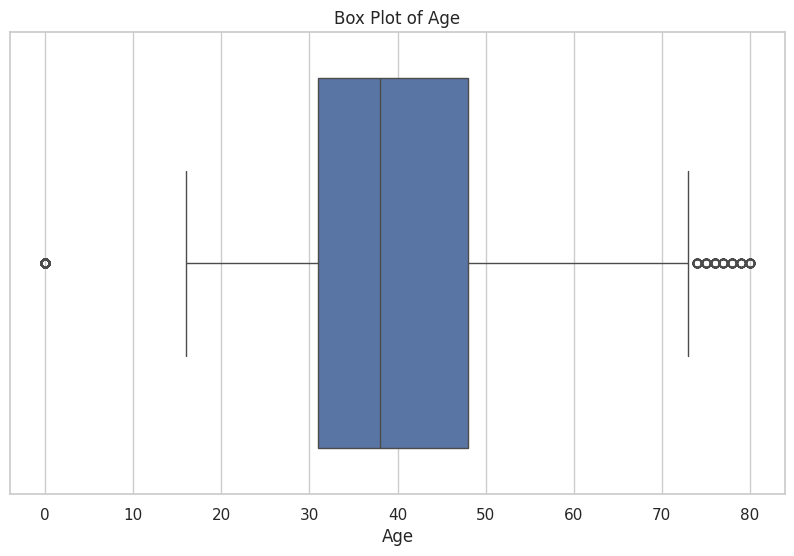

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', data=data)
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.show()

We can see some oitliers in our boxplot. We will use a common approach to remove the outlier known as Interquartile Range (IQR) method. The IQR method identifies outliers by looking at the distribution of the data points and defining outliers as those points that fall below the 1st quartile (25%) minus 1.5 times the IQR or above the 3rd quartile (75%) plus 1.5 times the IQR.

From the data description, the quartiles for "Age" are:

Q1 (25%): 31.0

Q3 (75%): 48.0

In [ ]:
# Quartile values for Age
Q1_age = 31.0
Q3_age = 48.0

# Calculate IQR for Age
IQR_age = Q3_age - Q1_age

# Calculate lower and upper bounds for Age to identify outliers
lower_bound_age = Q1_age - 1.5 * IQR_age
upper_bound_age = Q3_age + 1.5 * IQR_age

lower_bound_age, upper_bound_age


(5.5, 73.5)

To remove the outlier we'll use the filtering approach where we only keep rows where "Age" value falls within the calculated bound.

In [ ]:
cleaned_data = data[(data['Age'] >= 5.5) & (data['Age'] <= 73.5)]


In [ ]:
cleaned_data.Age.value_counts()

30    596
33    574
34    573
35    569
28    560
29    552
31    550
32    544
27    540
26    535
39    435
41    423
44    411
37    410
36    406
43    404
42    401
45    386
38    384
40    383
47    308
46    296
48    291
50    290
54    288
55    282
51    279
52    276
49    265
53    253
60    156
64    146
56    146
61    145
57    144
59    138
63    136
24    135
65    135
58    134
21    127
22    125
23    122
62    112
25    104
18     48
72     45
66     42
71     40
69     32
19     32
73     32
68     32
67     31
20     28
70     27
16      9
17      6
Name: Age, dtype: int64

In [ ]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14873 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 14873 non-null  object
 1   WeekOfMonth           14873 non-null  int64 
 2   DayOfWeek             14873 non-null  object
 3   Make                  14873 non-null  object
 4   AccidentArea          14873 non-null  object
 5   DayOfWeekClaimed      14873 non-null  object
 6   MonthClaimed          14873 non-null  object
 7   WeekOfMonthClaimed    14873 non-null  int64 
 8   Sex                   14873 non-null  object
 9   MaritalStatus         14873 non-null  object
 10  Age                   14873 non-null  int64 
 11  Fault                 14873 non-null  object
 12  PolicyType            14873 non-null  object
 13  VehicleCategory       14873 non-null  object
 14  VehiclePrice          14873 non-null  object
 15  FraudFound_P          14873 non-null

In [ ]:
# Describe the numerical variables
cleaned_data.describe().T

,count,mean,std,min,25%,50%,75%,max
WeekOfMonth,14873.0,2.792443,1.287751,1.0,2.0,3.0,4.0,5.0
WeekOfMonthClaimed,14873.0,2.692934,1.260636,1.0,2.0,3.0,4.0,5.0
Age,14873.0,40.149264,11.557463,16.0,31.0,38.0,48.0,73.0
FraudFound_P,14873.0,0.059369,0.236323,0.0,0.0,0.0,0.0,1.0
PolicyNumber,14873.0,7721.983863,4442.559834,1.0,3884.0,7716.0,11571.0,15420.0
RepNumber,14873.0,8.478047,4.598111,1.0,5.0,8.0,12.0,16.0
Deductible,14873.0,407.765750,44.000660,300.0,400.0,400.0,400.0,700.0
DriverRating,14873.0,2.487326,1.121093,1.0,1.0,2.0,3.0,4.0
Year,14873.0,1994.867814,0.803357,1994.0,1994.0,1995.0,1996.0,1996.0


I now have two datasets: `data`, which still has the outliers, and `cleaned_data`, from which outliers have been removed.

I intend to keep both datasets and explore them differently to leverage the pros and cons of removing the outliers.

## Data Visualization

**Being one with the data!!**

### Visualize the Fraudulent Claim Characteristics


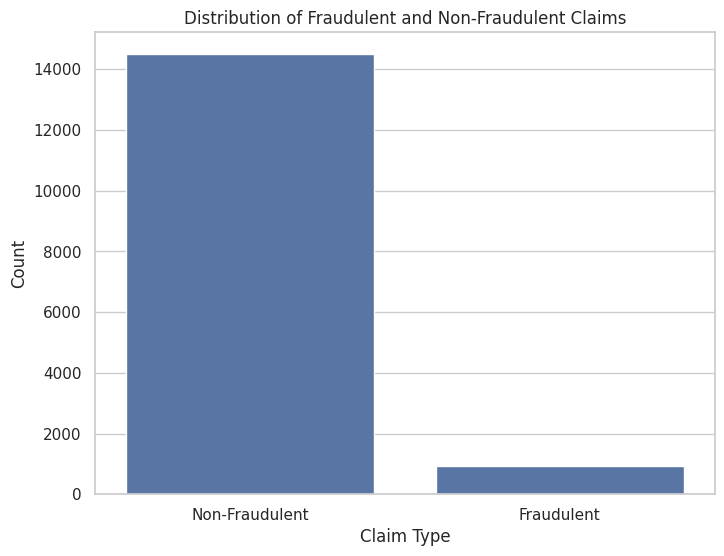

In [ ]:
# The target variable is 'FraudFound_P` with 1 indicating a fraudulent claim and 0 indicating a non-fraudulent claim
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the count plot
plt.figure(figsize=(8, 6))
sns.countplot(x='FraudFound_P', data=data)

# Adding titles and labels for clarity
plt.title('Distribution of Fraudulent and Non-Fraudulent Claims')
plt.xlabel('Claim Type')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Fraudulent', 'Fraudulent']) # This makes it clearer

plt.show()

**Observation**:

The number of `Non-Fraudulent` claims is more than the number of `Fraudulent` claims.

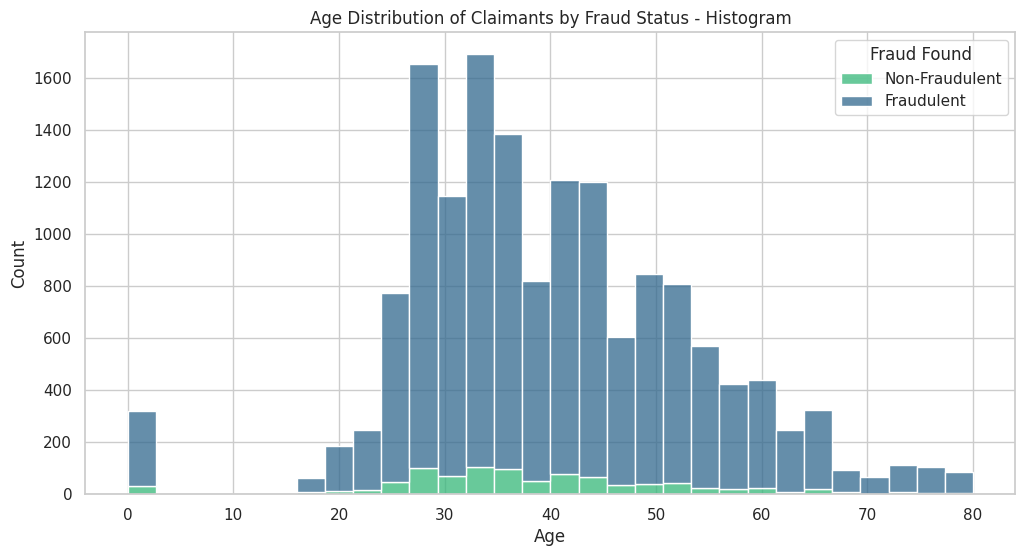

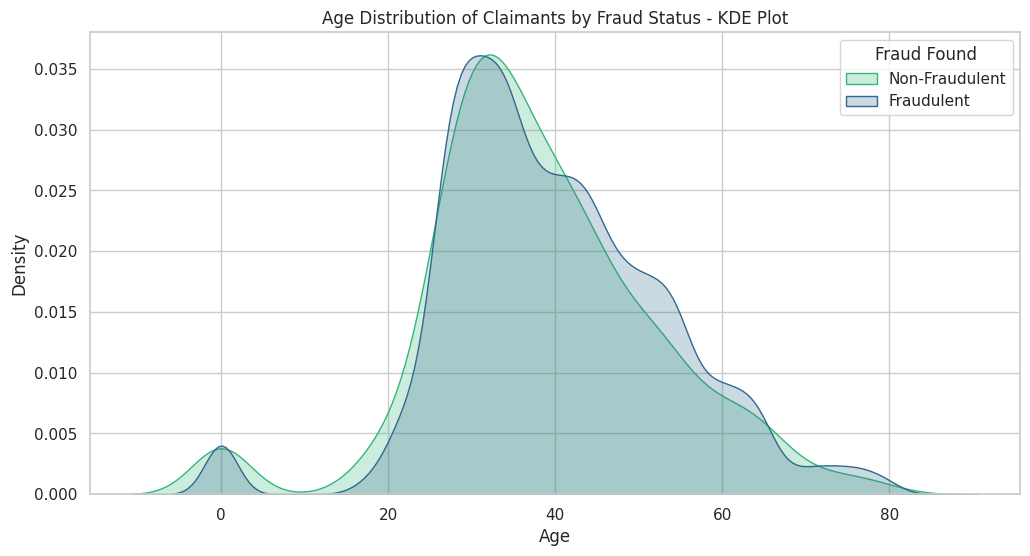

In [ ]:
## Use a histogram or kernel density estimate(KDE) plot to compare the age distribution of
# claimants between fraudulent and non-fraudulent claims.

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Histogram
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='Age', hue='FraudFound_P', multiple='stack', bins=30, palette='viridis')
plt.title('Age Distribution of Claimants by Fraud Status - Histogram')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Fraud Found', labels=['Non-Fraudulent', 'Fraudulent'])
plt.show()

# KDE Plot
plt.figure(figsize=(12, 6))
sns.kdeplot(data=data, x='Age', hue='FraudFound_P', common_norm=False, palette='viridis', fill=True)
plt.title('Age Distribution of Claimants by Fraud Status - KDE Plot')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Fraud Found', labels=['Non-Fraudulent', 'Fraudulent'])
plt.show()


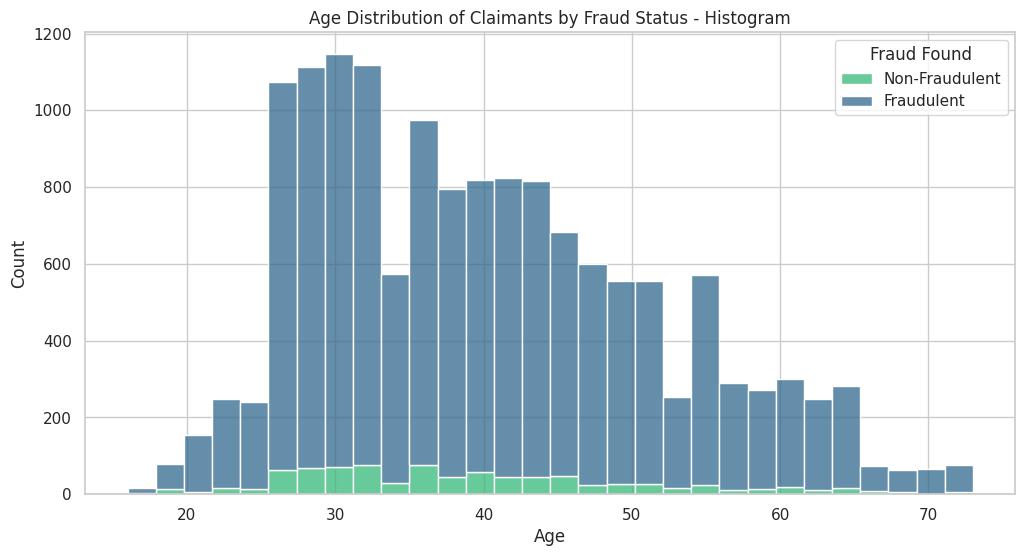

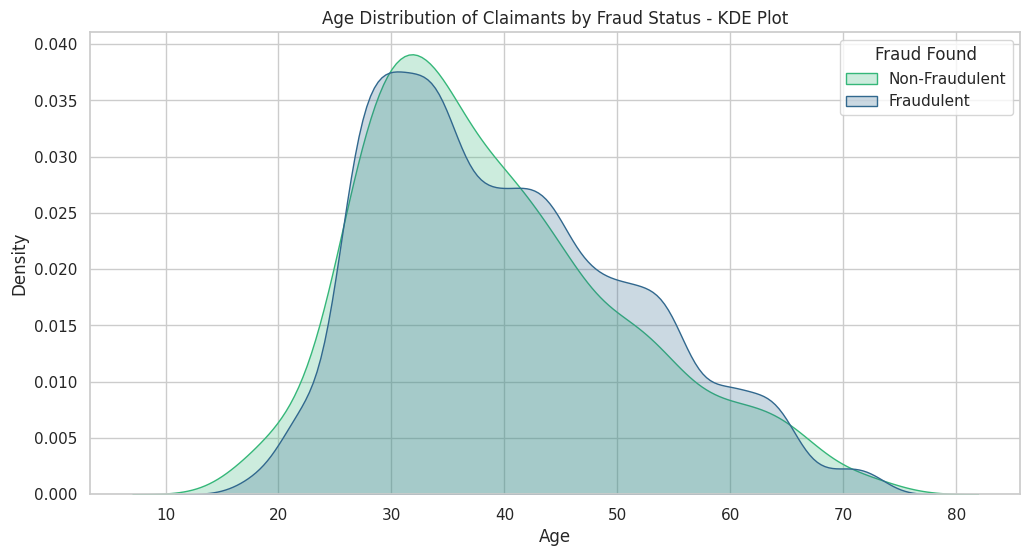

In [ ]:
# Lets repeate the same with our cleaned data

sns.set(style="whitegrid")

# Histogram
plt.figure(figsize=(12, 6))
sns.histplot(data=cleaned_data, x='Age', hue='FraudFound_P', multiple='stack', bins=30, palette='viridis')
plt.title('Age Distribution of Claimants by Fraud Status - Histogram')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Fraud Found', labels=['Non-Fraudulent', 'Fraudulent'])
plt.show()

# KDE Plot
plt.figure(figsize=(12, 6))
sns.kdeplot(data=cleaned_data, x='Age', hue='FraudFound_P', common_norm=False, palette='viridis', fill=True)
plt.title('Age Distribution of Claimants by Fraud Status - KDE Plot')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Fraud Found', labels=['Non-Fraudulent', 'Fraudulent'])
plt.show()


**Observations and Insights**:
- There are more claims between the ages of 25-35.
- There are more fraud claims between the ages of 25-35.

**Insights:**

- **Age Group Concentration**: The concentration of claims within the 25-45 age range suggests this is a particularly active demographic for insurance claims. This could reflect broader demographic trends in vehicle ownership, driving activity, or risk-taking behaviors.
- **Fraud Tendency in Younger Adults**: The higher incidence of fraud claims among the 25-35 age group could indicate several factors, such as financial pressures, differing attitudes towards insurance fraud, or perhaps a perception of lower risk of detection among younger adults.

In [ ]:
data.AgeOfPolicyHolder.value_counts()

31 to 35    5593
36 to 40    4043
41 to 50    2828
51 to 65    1392
26 to 30     613
over 65      508
16 to 17     320
21 to 25     108
18 to 20      15
Name: AgeOfPolicyHolder, dtype: int64

In [ ]:
pd.crosstab(data['FraudFound_P'], data['AgeOfPolicyHolder'], margins=True)

AgeOfPolicyHolder,16 to 17,18 to 20,21 to 25,26 to 30,31 to 35,36 to 40,41 to 50,51 to 65,over 65,All
FraudFound_P,,,,,,,,,,
0,289,13,92,580,5233,3806,2684,1322,478,14497
1,31,2,16,33,360,237,144,70,30,923
All,320,15,108,613,5593,4043,2828,1392,508,15420


In [ ]:
df_age = pd.DataFrame({
    'AgeGroup': ['16 to 17', '18 to 20', '21 to 25', '26 to 30', '31 to 35', '36 to 40', '41 to 50', '51 to 65', 'over 65'],
    'NonFraudulentClaims': [289, 13, 92, 580, 5233, 3806, 2684, 1322, 478],
    'FraudulentClaims': [31, 2, 16, 33, 360, 237, 144, 70, 30]
})
df_age['TotalClaims'] = df_age['NonFraudulentClaims'] + df_age['FraudulentClaims']
df_age['ProportionFraud'] = df_age['FraudulentClaims'] / df_age['TotalClaims']


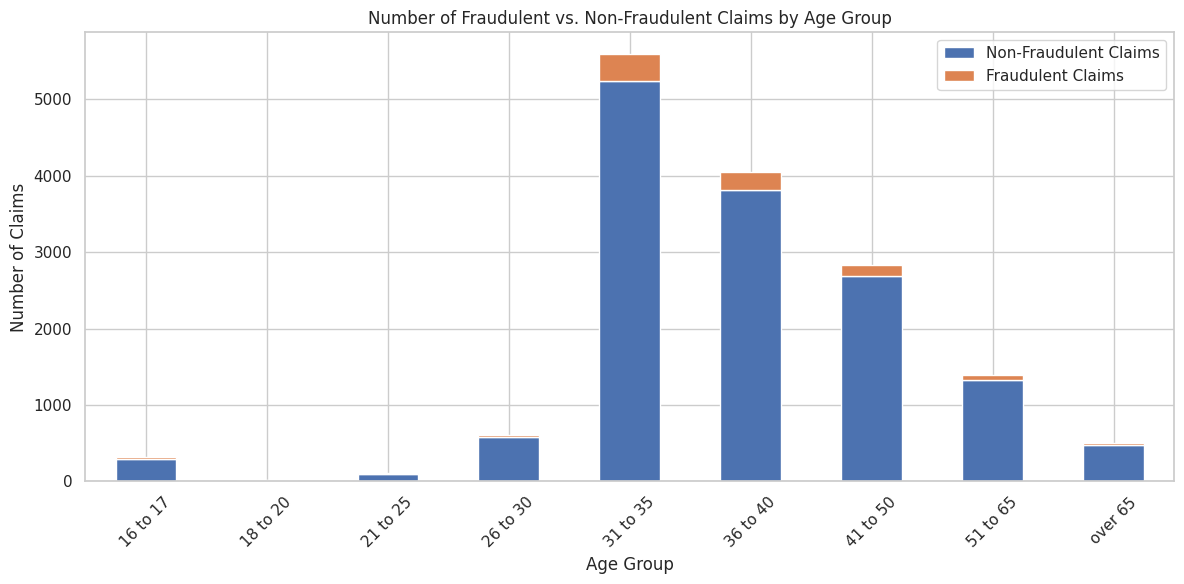

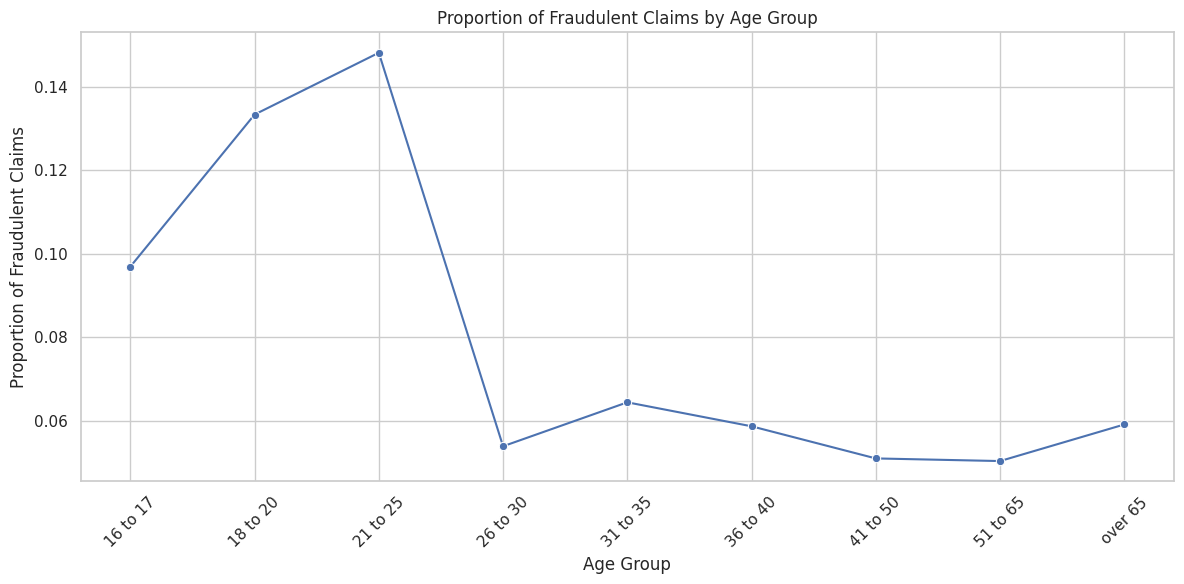

In [ ]:
# Creating the stacked bar chart
df_age.plot(kind='bar', x='AgeGroup', y=['NonFraudulentClaims', 'FraudulentClaims'], stacked=True, figsize=(12, 6))
plt.title('Number of Fraudulent vs. Non-Fraudulent Claims by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Claims')
plt.xticks(rotation=45)
plt.legend(['Non-Fraudulent Claims', 'Fraudulent Claims'])
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_age, x='AgeGroup', y='ProportionFraud', marker='o')
plt.title('Proportion of Fraudulent Claims by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion of Fraudulent Claims')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



**Observations**

1. **Predominant Age Groups**: The majority of non-fraudulent claims come from policyholders in the age groups of '31 to 35' and '36 to 40', indicating these age ranges are particularly active in filing claims. This pattern also extends to fraudulent claims, though to a lesser extent.

2. **Fraudulent Claims Distribution**: While fraudulent claims are distributed across all age groups, there's a noticeable concentration in the '31 to 35' and '36 to 40' age brackets. This suggests that middle-aged policyholders not only file more claims in general but also constitute a significant portion of fraudulent claims.

3. **Lower Incidence in Younger and Older Ages**: Both the youngest ('16 to 17', '18 to 20') and the oldest ('over 65') age groups have fewer claims overall, with a correspondingly low number of fraudulent claims. This could indicate lower risk of fraud but might also reflect fewer policies or less frequent filing among these age groups.

4. **Relative Proportion of Fraud Across Ages**: While raw numbers show middle-aged groups file more claims, including fraudulent ones, it's also important to consider the proportion of fraud within each age group to fully understand the risk profile.



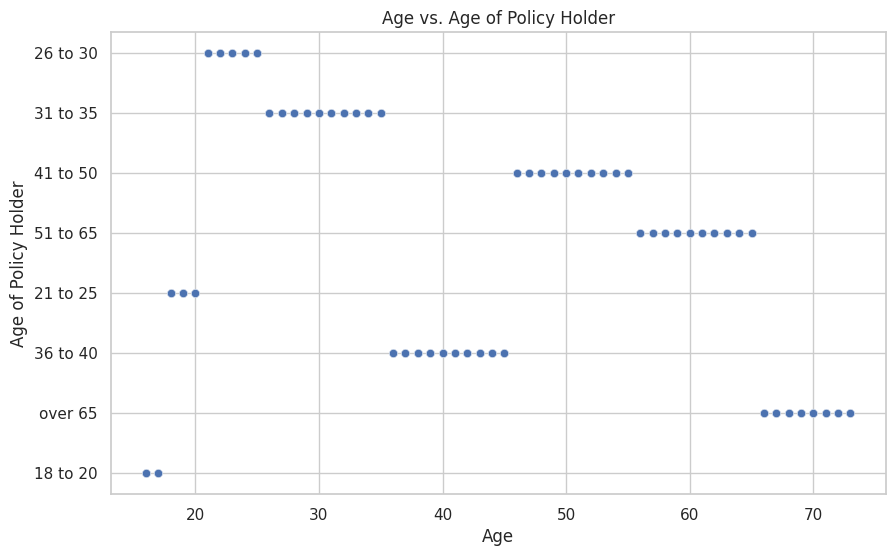

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='AgeOfPolicyHolder', data=cleaned_data, alpha=0.6)
plt.title('Age vs. Age of Policy Holder')
plt.xlabel('Age')
plt.ylabel('Age of Policy Holder')
plt.show()


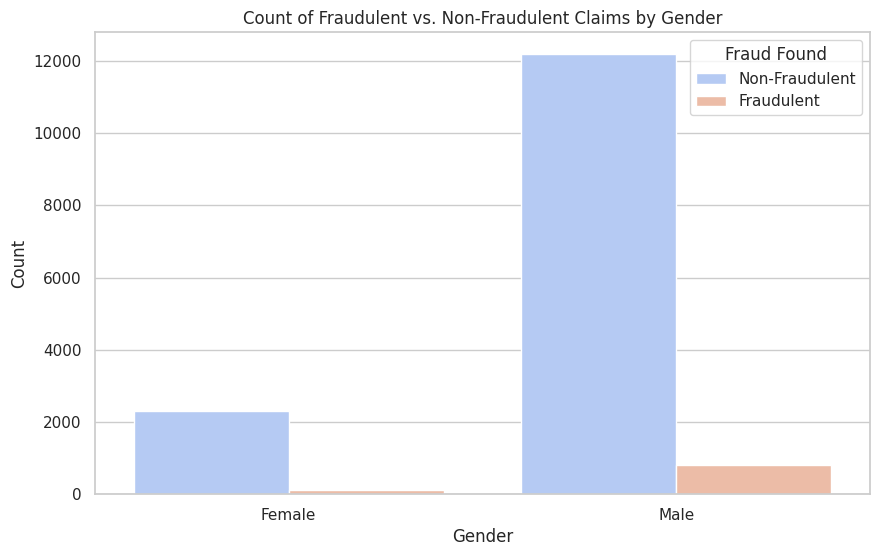

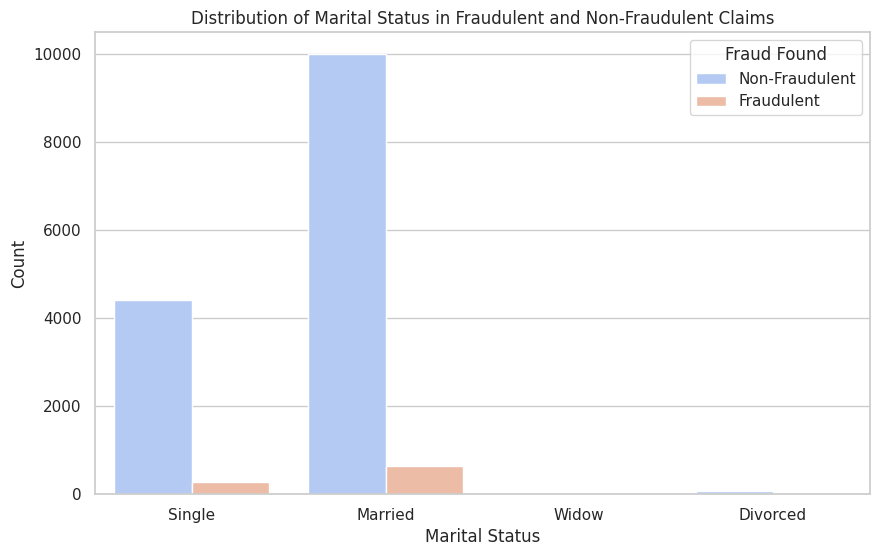

In [ ]:
## Use a bar chart to visualize the count of fraudulent vs. non-fraudulent claims by gender.
# and also to compare the distribution of marital status in fraudulent and non-fraudulent claims.


# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Sex: Count of Fraudulent vs. Non-Fraudulent Claims
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', hue='FraudFound_P', data=data, palette='coolwarm')
plt.title('Count of Fraudulent vs. Non-Fraudulent Claims by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Fraud Found', labels=['Non-Fraudulent', 'Fraudulent'])
plt.show()

# Marital Status: Distribution in Fraudulent and Non-Fraudulent Claims
plt.figure(figsize=(10, 6))
sns.countplot(x='MaritalStatus', hue='FraudFound_P', data=data, palette='coolwarm')
plt.title('Distribution of Marital Status in Fraudulent and Non-Fraudulent Claims')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Fraud Found', labels=['Non-Fraudulent', 'Fraudulent'])
plt.show()

**Observations and Insights**:

- Insurance claims are more prevalent in males than in females.
- The number of claims is higher in married people than in single people.
- There are very few claims among widowed and divorced individuals.
- Fraud claims are more common in males than in females.
- Fraud claims are more prevalent in married people than in any other group (Single, Widowed, Divorced).

**Insights**

**Gender Differences in Claims and Fraud**
- **Higher Prevalence Among Males**: The greater number of claims by males might reflect differences in risk behavior, insurance needs, or reporting habits between genders. The higher incidence of fraud claims among males could suggest targeted fraud prevention efforts might need to consider gender-specific strategies.
- **Implications for Risk Assessment**: Insurance companies might use these insights to refine risk assessment models, potentially adjusting premiums or the level of scrutiny applied to claims based on the claimant's gender, while ensuring compliance with regulations that prevent unfair discrimination.

**Marital Status and Its Impact**
- **Married Individuals Making More Claims**: This might reflect a higher number of policies held by married individuals or more opportunities for claims due to factors such as family size, number of insured assets, or lifestyle. The higher incidence of fraud in this group could suggest that these claims merit closer examination, especially in areas related to family coverage or asset insurance.
- **Low Claims in Widowed and Divorced Groups**: The lower number of claims from widowed and divorced individuals might indicate less engagement with insurance services or fewer opportunities for claims. It could also reflect a more cautious or conservative approach to filing claims among these demographics.
- **Fraud Prevalence in Married People**: This observation might point to specific vulnerabilities or motivations associated with marital status that could be explored further. It raises questions about whether the complexity of policies for families or the financial pressures faced by married individuals might contribute to this trend.

**Strategy Implications**
- **Targeted Fraud Detection**: These insights could inform more targeted fraud detection and prevention strategies. For example, incorporating gender and marital status into predictive modeling could improve the accuracy of fraud detection algorithms.
- **Customer Education**: Insurance companies might consider tailored customer education programs that address the specific needs and risks associated with different demographic groups, emphasizing the legal and financial consequences of committing insurance fraud.
- **Policy Design and Marketing**: Understanding the demographic patterns in claims and fraud could also guide the design of insurance products and marketing strategies, aiming to better meet the needs of different groups while mitigating risks.

In [ ]:
data.Fault.value_counts()

Policy Holder    11230
Third Party       4190
Name: Fault, dtype: int64

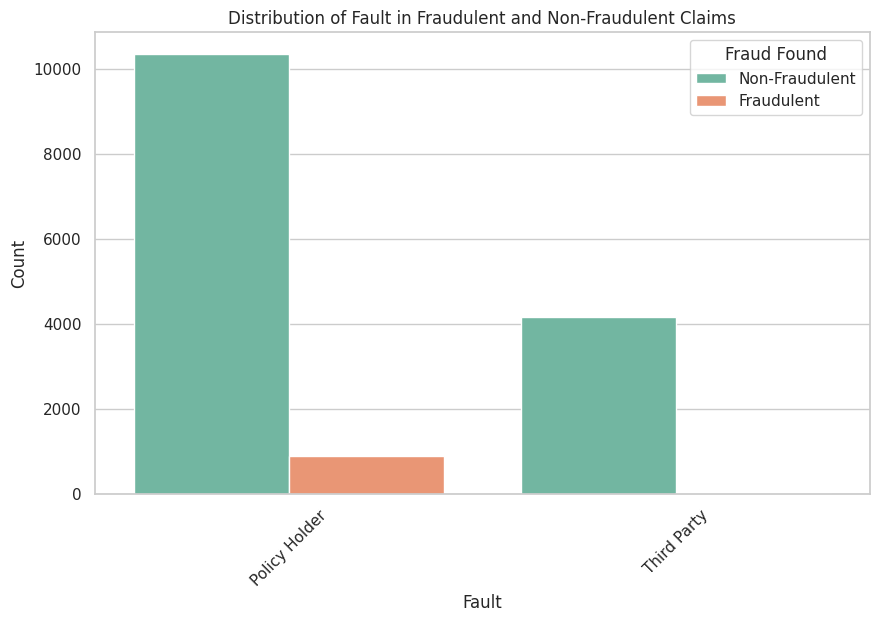

In [ ]:
# Create a bar chart to see how the distribution of fault (who is at fault in the claim) differs between fraudulent and non-fraudulent claims.


# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.countplot(x='Fault', hue='FraudFound_P', data=data, palette='Set2')
plt.title('Distribution of Fault in Fraudulent and Non-Fraudulent Claims')
plt.xlabel('Fault')
plt.ylabel('Count')
plt.legend(title='Fraud Found', labels=['Non-Fraudulent', 'Fraudulent'])
plt.xticks(rotation=45) # In case the fault categories are lengthy or numerous
plt.show()


**Observations**:
- In the `Fault` category, there are more `Policy Holders` than `Third Parties`. The numbers are as follows:
    - Policy Holder: 11230
    - Third Party: 4190
- In the `Fault` category, `Policy Holders` have more claims than `Third Parties`.
- Fraud claims are more common among `Policy Holders`.


**Insights**


**Policy Holders vs. Third Parties**
- **Higher Claims by Policy Holders**: The fact that policy holders have more claims than third parties might indicate that policy holders are more likely to report claims. This could be due to a variety of factors, including the nature of insurance coverage, policyholder awareness, or incentives for reporting.
- **Fraud Prevalence Among Policy Holders**: The higher incidence of fraud claims among policy holders suggests that fraudulent activities might be more associated with the party holding the policy rather than external parties. This could reflect on the motivations behind fraud, such as attempting to benefit


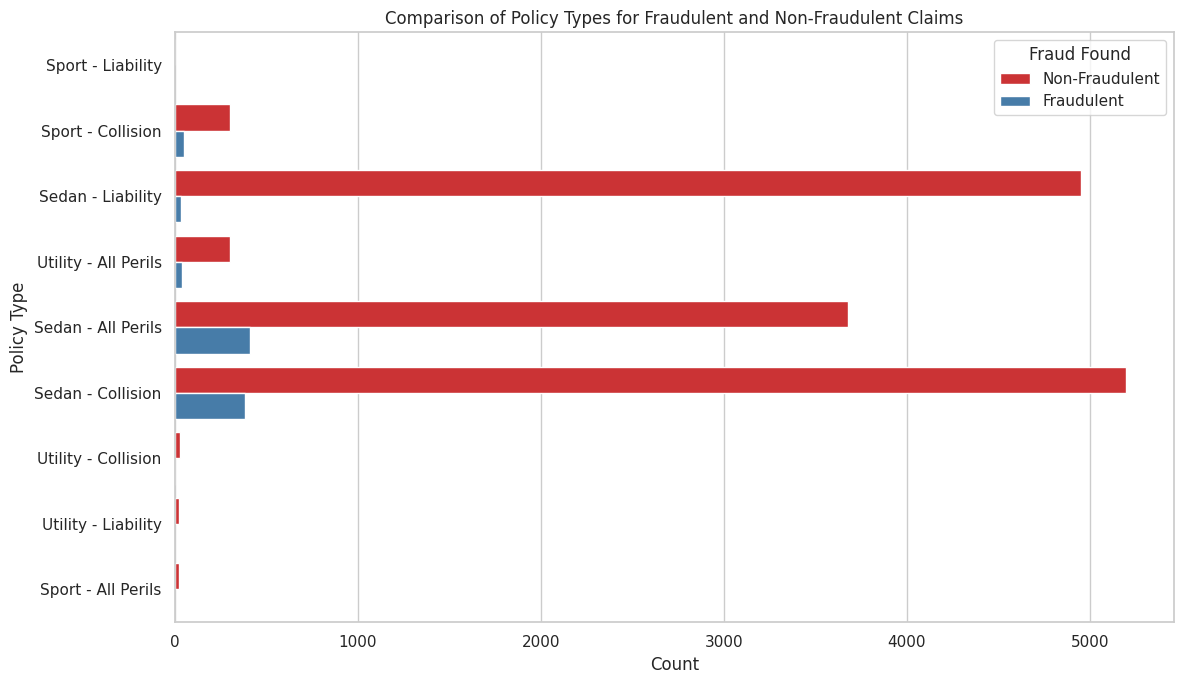

In [ ]:
## Use a bar chart to compare the frequencies of different policy types for
# fraudulent and non-fraudulent claims.

sns.set(style="whitegrid")

# Create the bar chart
plt.figure(figsize=(12, 7))
sns.countplot(y='PolicyType', hue='FraudFound_P', data=data, palette='Set1')
plt.title('Comparison of Policy Types for Fraudulent and Non-Fraudulent Claims')
plt.xlabel('Count')
plt.ylabel('Policy Type')
plt.legend(title='Fraud Found', labels=['Non-Fraudulent', 'Fraudulent'])
plt.tight_layout()
plt.show()

**Observations**:
- In the `PolicyType` variable, people with `Sedan-Collision` have the most claims in the dataset.
- People with fewer claims include those with `Utility - Collision`, `Utility-Liability`, `Sport- All Perils`. `Sport-Liability` has almost none.
- Fraud claims are more common in `Sedan- All Perils` and `Sedan-Collision`.
- Even though `Sedan-Collision` has more claims than `Sedan- All Perils`, the number of fraud claims is almost the same in both policy types.

**Insights**
- **High Volume of Claims for Sedan-Collision**: This indicates that policies covering sedans, specifically for collisions, are particularly prone to claims. This could reflect higher usage rates of sedans, the nature of collision coverage, or potentially higher risk of accidents.
- **Lower Claims in Certain Policy Types**: Policies like Utility - Collision, Utility-Liability, and Sport - All Perils, including Sport-Liability, see fewer claims. This might suggest lower risk associated with these vehicle types or policy coverages, or possibly fewer numbers of these policies in circulation.
- **Fraud Prevalence in Sedan Policies**: The high number of fraud claims in both Sedan - All Perils and Sedan-Collision policies could indicate that these types of policies are more attractive for fraudulent activities, possibly due to the value of the vehicles covered or the conditions of the policy.
- **Similar Fraud Claims in Sedan-Collision and Sedan- All Perils**: Despite the difference in total claims, the similarity in the number of fraud claims between these two policy types suggests that the risk of fraud might be comparably high for both, indicating a specific vulnerability in policies covering sedans.



In [ ]:
data.Deductible.value_counts()

400    14838
700      311
500      263
300        8
Name: Deductible, dtype: int64

In [ ]:
pd.crosstab(data['FraudFound_P'], data['Deductible'], margins=True)

Deductible,300,400,500,700,All
FraudFound_P,,,,,
0,6,13982,216,293,14497
1,2,856,47,18,923
All,8,14838,263,311,15420


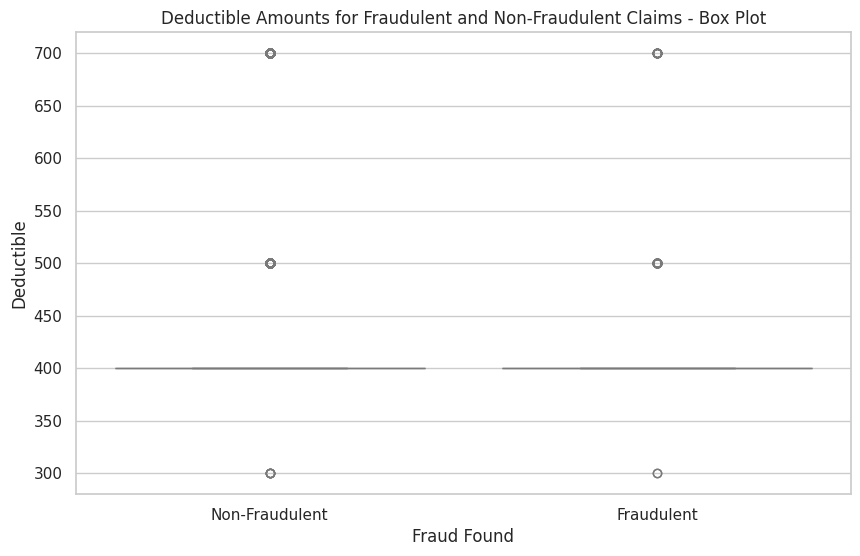

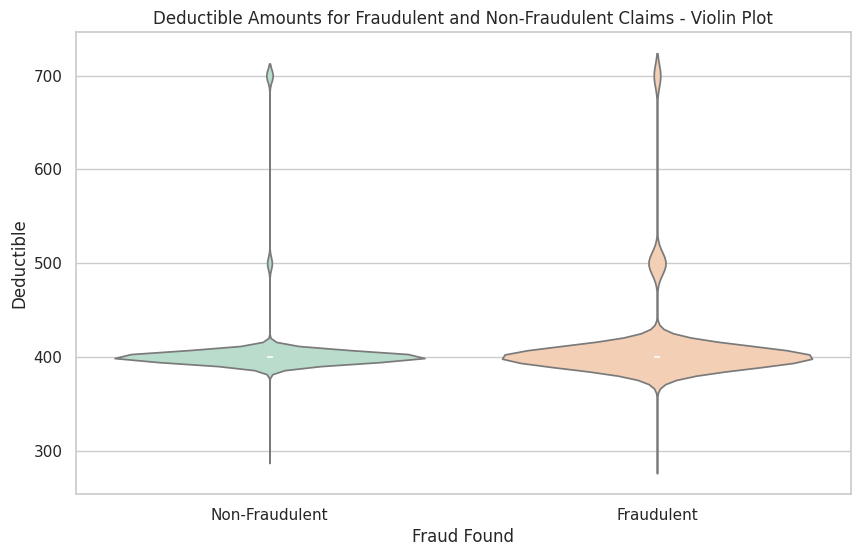

In [ ]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='FraudFound_P', y='Deductible', data=data, palette='Pastel1')
plt.title('Deductible Amounts for Fraudulent and Non-Fraudulent Claims - Box Plot')
plt.xlabel('Fraud Found')
plt.ylabel('Deductible')
plt.xticks([0, 1], ['Non-Fraudulent', 'Fraudulent'])
plt.show()

# Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='FraudFound_P', y='Deductible', data=data, palette='Pastel2')
plt.title('Deductible Amounts for Fraudulent and Non-Fraudulent Claims - Violin Plot')
plt.xlabel('Fraud Found')
plt.ylabel('Deductible')
plt.xticks([0, 1], ['Non-Fraudulent', 'Fraudulent'])
plt.show()

Sure, here's your text with corrections:

**Observations**:
- The distribution of deductibles against claims is higher at 400 than at any other value.
- This distribution is the same for both Non-Fraudulent and Fraudulent claims.
- Here is more information:

|FraudFound\_P|300|400|500|700|All|
|---|---|---|---|---|---|
|0|6|13982|216|293|14497|
|1|2|856|47|18|923|
|All|8|14838|263|311|15420|

**Insights**


- **Dominance of 400 Deductible**: The overwhelming majority of claims, both fraudulent and non-fraudulent, have a deductible amount of 400. This suggests that policies with a 400 deductible are either more common or more likely to result in claims.
- **Similar Distribution Patterns**: The fact that the distribution pattern of deductibles is similar for both fraudulent and non-fraudulent claims indicates that the choice of deductible amount might not be a significant factor in determining the likelihood of a claim being fraudulent. Instead, it reflects the overall popularity of certain deductible amounts in the policies chosen by policyholders.
- **Low Incidence of Extreme Deductibles**: The table shows a very low number of claims with the minimum (300) and maximum (700) deductibles, suggesting that policyholders tend to prefer intermediate deductible amounts, possibly balancing out-of-pocket expenses and premium costs.

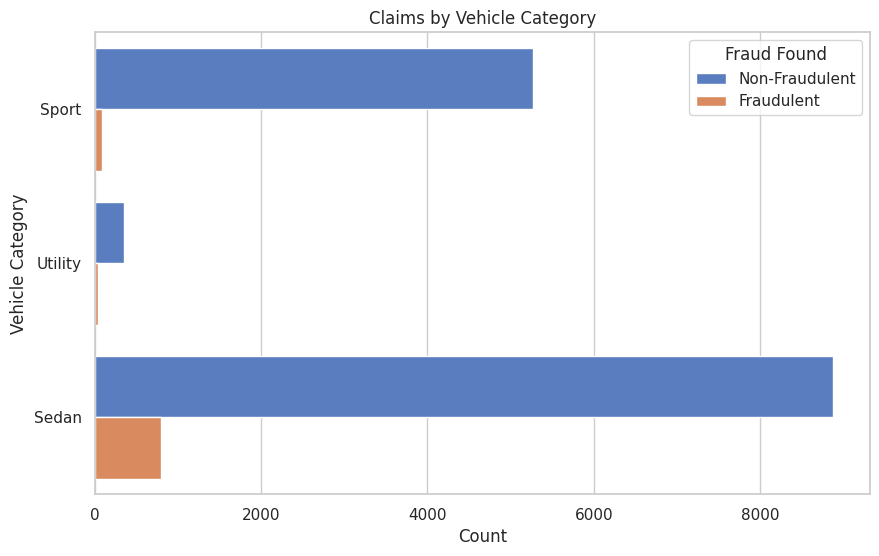

In [ ]:
# Lets analyse and visualize the vehicle information
# We will start with vehicle category and visualize it

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(y='VehicleCategory', hue='FraudFound_P', data=data, palette='muted')
plt.title('Claims by Vehicle Category')
plt.xlabel('Count')
plt.ylabel('Vehicle Category')
plt.legend(title='Fraud Found', labels=['Non-Fraudulent', 'Fraudulent'])
plt.show()

**Observations**:
- There are generally more claims in the Sedan category than in the other categories (Sport, Utility).
- Given the higher number of claims in the Sedan category, there are more instances of fraud claims.
- This is followed by the Sport category, with Utility having the least number of claims.

**Interpretation and Insights**

1. **Predominance of Sedan Claims**: The high volume of claims in the Sedan category might reflect its popularity or prevalence among policyholders. Sedans, being common for both personal and commercial use, might inherently carry a higher volume of claims. The corresponding higher instances of fraud within this category could be proportional to the overall higher number of claims, or it could indicate specific vulnerabilities or tendencies for fraudulent activities associated with sedans.

2. **Sport and Utility Categories**: The observation that Sport vehicles also have a considerable number of claims, but less than Sedans, with Utility vehicles having the least, could reflect several factors. These might include the overall number of such vehicles insured, their usage patterns (e.g., less frequent use of sports vehicles), or inherent risks associated with vehicle types (e.g., utility vehicles might be used in less risky conditions or have different safety features).

In [ ]:
data.groupby('FraudFound_P')['AgeOfVehicle'].describe()

,count,unique,top,freq
FraudFound_P,,,,
0,14497,8,7 years,5482
1,923,8,7 years,325


In [ ]:
pd.crosstab(data['FraudFound_P'], data['AgeOfVehicle'], margins=True)

AgeOfVehicle,2 years,3 years,4 years,5 years,6 years,7 years,more than 7,new,All
FraudFound_P,,,,,,,,,
0,70,139,208,1262,3220,5482,3775,341,14497
1,3,13,21,95,228,325,206,32,923
All,73,152,229,1357,3448,5807,3981,373,15420


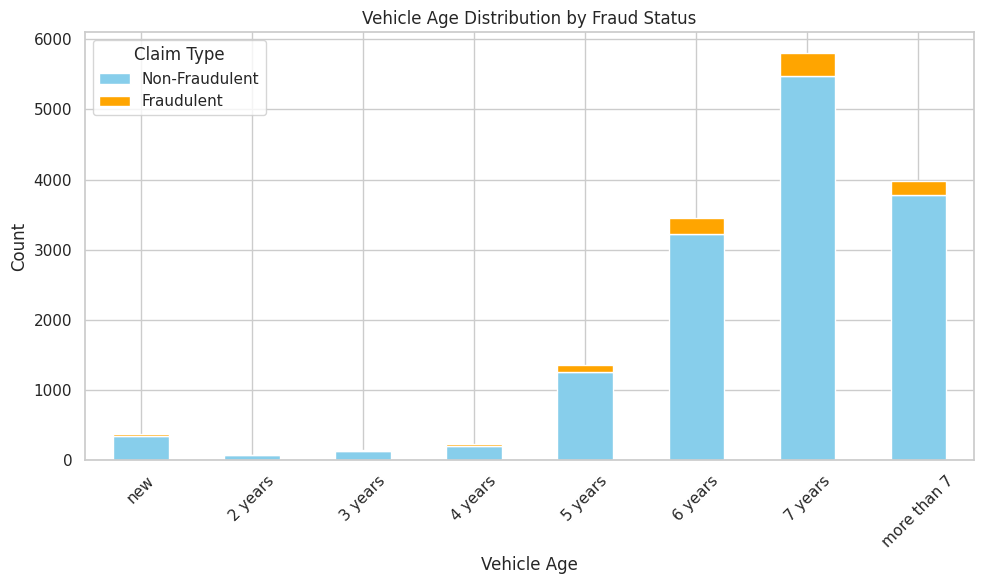

In [ ]:
# Getting this values from the above table
data_dict = {
    'Vehicle Age': ['new', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', 'more than 7'],
    'Non-Fraudulent': [341, 70, 139, 208, 1262, 3220, 5482, 3775],
    'Fraudulent': [32, 3, 13, 21, 95, 228, 325, 206]
}

df = pd.DataFrame(data_dict)

# Setting the 'Vehicle Age' as index for easier plotting
df.set_index('Vehicle Age', inplace=True)

# Plotting
df.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'orange'])
plt.title('Vehicle Age Distribution by Fraud Status')
plt.xlabel('Vehicle Age')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Claim Type')
plt.tight_layout()
plt.show()


**Observations**:
- There are more claims for vehicles aged between 5 and 7 years, and those older than 7 years.
- Claims are most common for vehicles of 7 years of age, which also have more fraud claims.
- The number of claims for vehicles older than 7 years is higher than that for vehicles of 6 years, yet the number of fraud claims for 6-year-old vehicles is slightly higher than that for vehicles older than 7 years.
- There is a significant number of fraud claims noted in new vehicles.

**Interpretation and Insights**

1. **Higher Claims in Middle-aged Vehicles**: The increased number of claims for vehicles aged between 5 and 7 years, as well as those older than 7 years, might indicate a point in a vehicle's life where issues start to become more common, leading to more claims. This could also reflect the depreciation curve of vehicles, where the cost of repair becomes less justifiable as the vehicle ages.

2. **Peak Claims at 7 Years**: Vehicles at 7 years of age having the most claims, including fraud, suggests a potential sweet spot where the value of claims and the likelihood of fraud intersect. This could be due to several factors, such as the perceived value of the vehicle, warranty expirations, or changes in insurance coverage.

3. **Fraud Claims in 6-year-old vs. Older than 7-year-old Vehicles**: The slightly higher number of fraud claims for 6-year-old vehicles compared to those older than 7 years might indicate specific vulnerabilities or fraud opportunities associated with this vehicle age. It could suggest that fraudsters perceive these vehicles as having a higher claim value or lower detection risk.

4. **Significant Fraud in New Vehicles**: The notable number of fraud claims in new vehicles is particularly interesting. This could reflect attempts to exploit the higher value associated with newer vehicles through insurance fraud. It might also indicate that certain types of fraud are easier to commit with new vehicles, such as exaggerating the extent of damage or fabricating claims.

In [ ]:
data.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [ ]:
data.VehiclePrice.dtype

dtype('O')

We can see `VehiclePrice` is an object

In [ ]:
data.VehiclePrice.value_counts()

20000 to 29000     8079
30000 to 39000     3533
more than 69000    2164
less than 20000    1096
40000 to 59000      461
60000 to 69000       87
Name: VehiclePrice, dtype: int64

In [ ]:
pd.crosstab(data['FraudFound_P'], data['VehiclePrice'], margins=True)

VehiclePrice,20000 to 29000,30000 to 39000,40000 to 59000,60000 to 69000,less than 20000,more than 69000,All
FraudFound_P,,,,,,,
0,7658,3358,430,83,993,1975,14497
1,421,175,31,4,103,189,923
All,8079,3533,461,87,1096,2164,15420


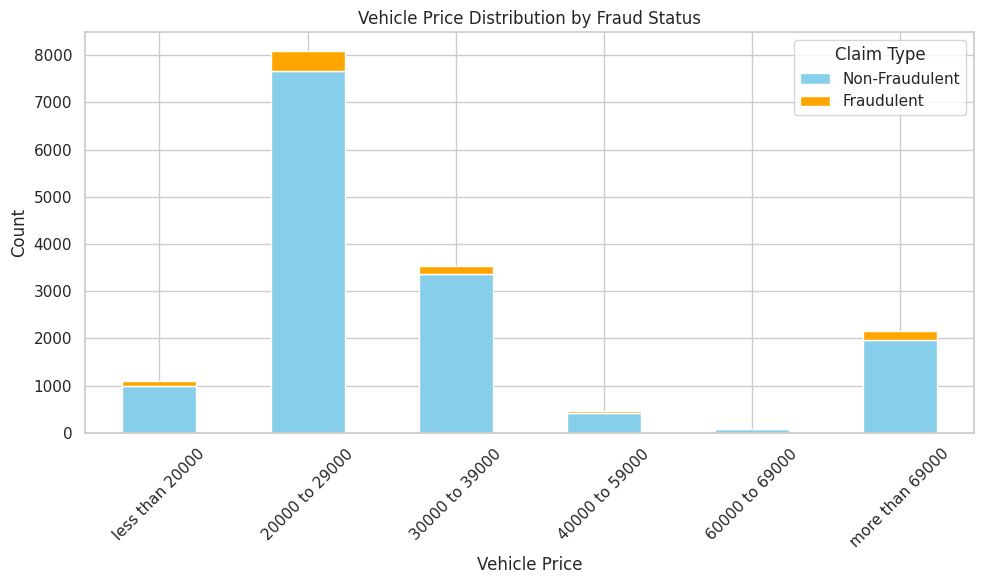

In [ ]:
# Getting this values from the above table
data_dict = {
    'Vehicle Price': ['less than 20000', '20000 to 29000', '30000 to 39000', '40000 to 59000', '60000 to 69000', 'more than 69000'],
    'Non-Fraudulent': [993, 7658, 3358, 430, 83, 1975],
    'Fraudulent': [103, 421, 175, 31, 4, 189]
}

df = pd.DataFrame(data_dict)

# Setting the 'Vehicle Age' as index for easier plotting
df.set_index('Vehicle Price', inplace=True)

# Plotting
df.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'orange'])
plt.title('Vehicle Price Distribution by Fraud Status')
plt.xlabel('Vehicle Price')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Claim Type')
plt.tight_layout()
plt.show()


**Observations**:
- There are more claims for vehicles priced between 20,000 and 29,000.
- Also, the number of fraud claims in this price range is high.
- Although the number of claims for vehicles priced between 30,000 and 39,000 is larger than that for vehicles priced above 69,000, the number of fraud cases found in vehicles priced above 69,000 is significantly higher.
- The number of fraud cases in the rest of the price categories is relatively low due to fewer claims.

**Interpretation and Insights**

1. **High Volume of Claims in the $20,000 to $29,000 Range**: This suggests that vehicles within this price range are common among policyholders and possibly more prone to claims. The high number of fraud claims in this category might reflect the attractiveness of these vehicles to fraudsters due to their prevalence.

2. **Disproportionate Fraud in Higher-Priced Vehicles**: Despite fewer overall claims for vehicles priced above $69,000, the significant incidence of fraud in this category indicates that when claims are made, they are much more likely to be fraudulent. This could be due to the higher potential payout or perceived value in defrauding insurance for high-value vehicles.




Lets visualize the time Between Accident and Claim Report: Analyzing the duration between the accident date and the claim report date can reveal patterns; shorter or longer durations may indicate suspicious activity.

In [ ]:
data.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [ ]:
data.head().T

,0,1,2,3,4
Month,Dec,Jan,Oct,Jun,Jan
WeekOfMonth,5,3,5,2,5
DayOfWeek,Wednesday,Wednesday,Friday,Saturday,Monday
Make,Honda,Honda,Honda,Toyota,Honda
AccidentArea,Urban,Urban,Urban,Rural,Urban
DayOfWeekClaimed,Tuesday,Monday,Thursday,Friday,Tuesday
MonthClaimed,Jan,Jan,Nov,Jul,Feb
WeekOfMonthClaimed,1,4,2,1,2
Sex,Female,Male,Male,Male,Female
MaritalStatus,Single,Single,Married,Married,Single


In [ ]:
# Convert Month and MonthClaimed to numeric

month_map = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
             'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

# Convert Month to numeric
data['Month'] = data['Month'].map(month_map)

# Convert MonthClaimed to numeric
data['MonthClaimed'] = data['MonthClaimed'].map(month_map)

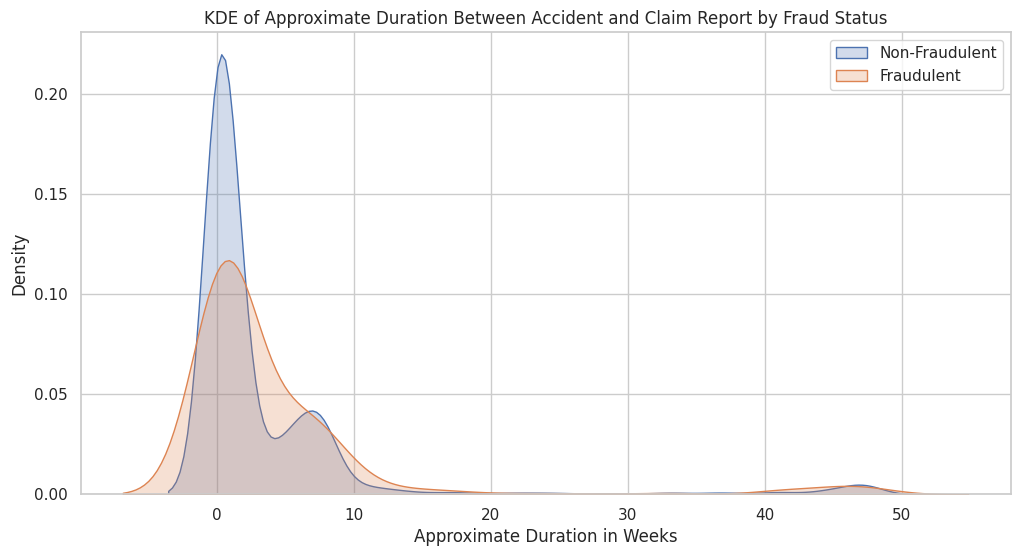

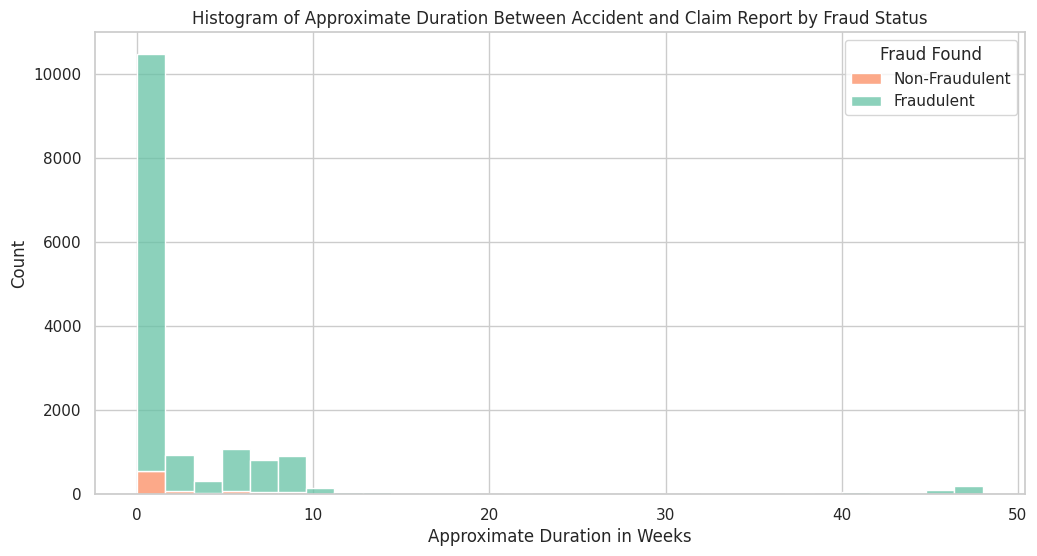

In [ ]:
# Calculate the difference in months and weeks
data['MonthsDifference'] = abs((data['MonthClaimed'] - data['Month'])) * 4
data['WeeksDifference'] = abs(data['WeekOfMonthClaimed'] - data['WeekOfMonth'])
data['ApproxDurationInWeeks'] = data['MonthsDifference'] + data['WeeksDifference']

# Plotting KDE
plt.figure(figsize=(12, 6))
sns.kdeplot(data=data[data['FraudFound_P'] == 0]['ApproxDurationInWeeks'], label='Non-Fraudulent', shade=True)
sns.kdeplot(data=data[data['FraudFound_P'] == 1]['ApproxDurationInWeeks'], label='Fraudulent', shade=True)
plt.title('KDE of Approximate Duration Between Accident and Claim Report by Fraud Status')
plt.xlabel('Approximate Duration in Weeks')
plt.ylabel('Density')
plt.legend()
plt.show()

# Plotting histogram
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='ApproxDurationInWeeks', hue='FraudFound_P', multiple='stack', palette='Set2', bins=30)
plt.title('Histogram of Approximate Duration Between Accident and Claim Report by Fraud Status')
plt.xlabel('Approximate Duration in Weeks')
plt.ylabel('Count')
plt.legend(title='Fraud Found', labels=['Non-Fraudulent', 'Fraudulent'])
plt.show()



We can see some outliers, lets try to remove them

In [ ]:
data.ApproxDurationInWeeks.describe()

count    15419.000000
mean         3.489461
std          8.064458
min          0.000000
25%          0.000000
50%          1.000000
75%          4.000000
max         48.000000
Name: ApproxDurationInWeeks, dtype: float64

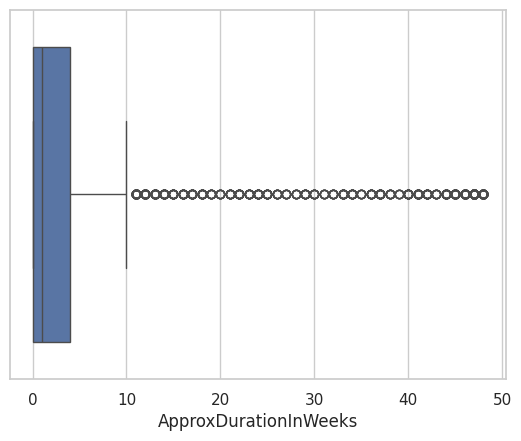

In [ ]:
sns.boxplot(x = data['ApproxDurationInWeeks'])
plt.show()

In [ ]:
data.ApproxDurationInWeeks.value_counts()

0.0     6650
1.0     3810
7.0      805
8.0      794
2.0      740
6.0      584
5.0      493
4.0      326
3.0      195
47.0     112
9.0      107
48.0      76
10.0      75
11.0      67
46.0      63
12.0      51
45.0      44
13.0      37
41.0      31
44.0      30
14.0      27
17.0      20
37.0      20
18.0      19
33.0      18
16.0      16
42.0      16
22.0      15
15.0      14
40.0      13
24.0      13
34.0      12
36.0      11
25.0      11
23.0      10
21.0      10
29.0       9
19.0       8
30.0       7
38.0       7
43.0       7
26.0       7
32.0       7
28.0       6
27.0       6
20.0       6
31.0       5
35.0       5
39.0       4
Name: ApproxDurationInWeeks, dtype: int64

In [ ]:
IQR = 4 - 0
lower_bound = 0 - 1.5 * IQR
upper_bound = 4 + 1.5 * IQR

In [ ]:
filtered_data_duration = data[(data['ApproxDurationInWeeks'] >= lower_bound) & (data['ApproxDurationInWeeks'] <= upper_bound)]


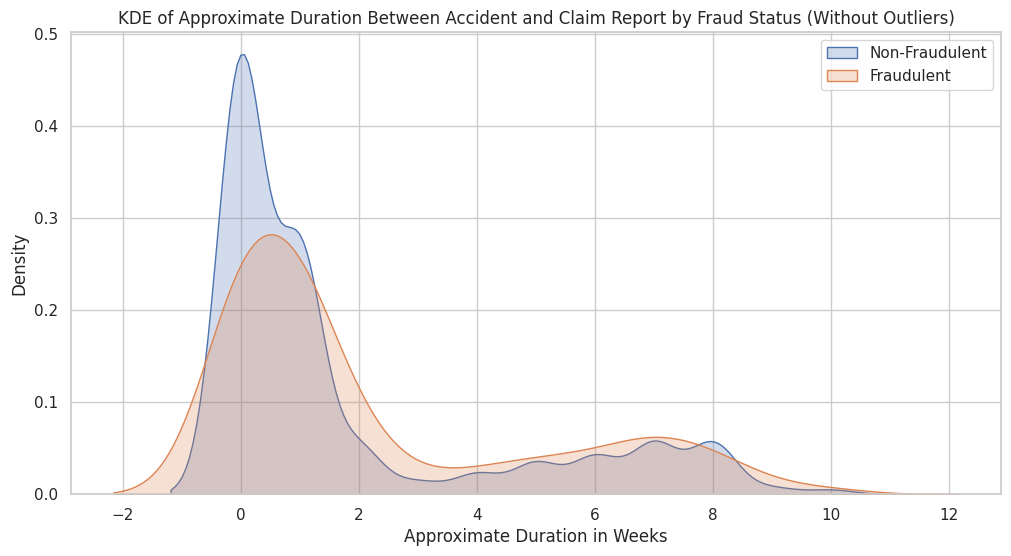

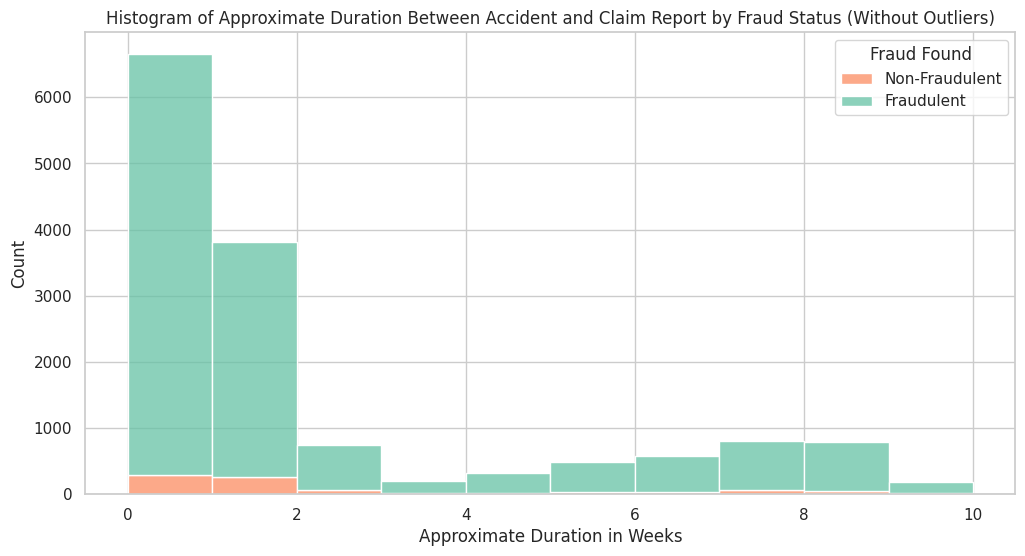

In [ ]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data=filtered_data_duration[filtered_data_duration['FraudFound_P'] == 0]['ApproxDurationInWeeks'], label='Non-Fraudulent', shade=True)
sns.kdeplot(data=filtered_data_duration[filtered_data_duration['FraudFound_P'] == 1]['ApproxDurationInWeeks'], label='Fraudulent', shade=True)
plt.title('KDE of Approximate Duration Between Accident and Claim Report by Fraud Status (Without Outliers)')
plt.xlabel('Approximate Duration in Weeks')
plt.ylabel('Density')
plt.legend()
plt.show()


plt.figure(figsize=(12, 6))
sns.histplot(data=filtered_data_duration, x='ApproxDurationInWeeks', hue='FraudFound_P', multiple='stack', palette='Set2', binwidth=1)
plt.title('Histogram of Approximate Duration Between Accident and Claim Report by Fraud Status (Without Outliers)')
plt.xlabel('Approximate Duration in Weeks')
plt.ylabel('Count')
plt.legend(title='Fraud Found', labels=['Non-Fraudulent', 'Fraudulent'])
plt.show()


**Observations**:
- Most claims are made 2 weeks from when the accident happened.
- We can also observe that some claims were made even up to the 48th week from when the accident occurred, though they are few.
- We can also observe that the duration in which more claims were made, consequently, the more fraud cases.

 **Interpretations/ Insights**

1. **Claims Peak at 2 Weeks**: The concentration of claims within two weeks after an accident suggests a common timeline for claimants to assess damages, complete necessary paperwork, and file a claim. This period might be driven by policy requirements, advice from insurance agents, or the natural timeline for recovery and response after an accident.

2. **Longer Duration Claims**: The presence of claims made up to the 48th week highlights that, while uncommon, there are scenarios where claims are delayed significantly. These could be due to extended negotiations, discovery of late-onset issues related to the accident, or potentially strategic delays by claimants.

3. **Correlation Between Claim Timing and Fraud Cases**: The observation that periods with more claims also see more fraud cases could suggest that fraudsters follow similar timelines as legitimate claimants, possibly to blend in with the volume of genuine claims. Alternatively, it could indicate that periods of high claim volume are targeted due to perceived vulnerabilities in the claims processing workflow.



In [ ]:
pd.crosstab(data['FraudFound_P'], data['DayOfWeek'], margins=True)

DayOfWeek,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,All
FraudFound_P,,,,,,,,
0,2291,2456,1850,1623,2053,2180,2044,14497
1,154,160,132,122,120,120,115,923
All,2445,2616,1982,1745,2173,2300,2159,15420


In [ ]:
pd.crosstab(data['FraudFound_P'], data['DayOfWeekClaimed'], margins=True)

DayOfWeekClaimed,0,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,All
FraudFound_P,,,,,,,,,
0,1,2333,3541,117,49,2516,3177,2763,14497
1,0,164,216,10,3,144,198,188,923
All,1,2497,3757,127,52,2660,3375,2951,15420


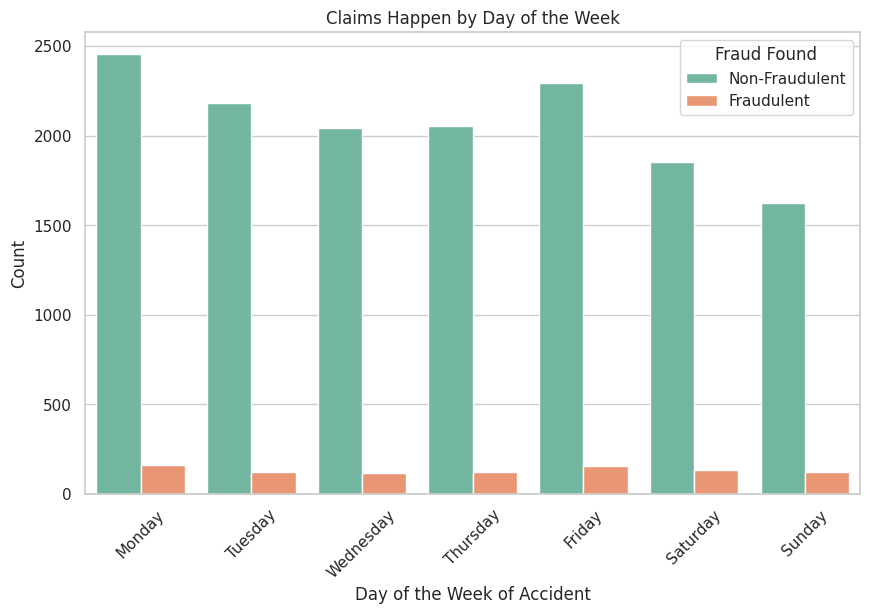

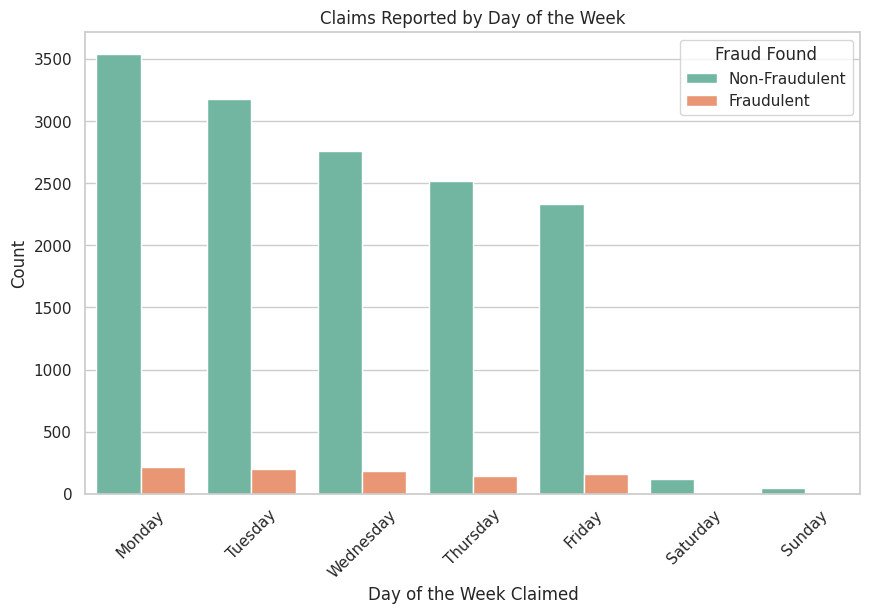

In [ ]:
#Visualizing Day of the Week when accident occurred

plt.figure(figsize=(10, 6))
sns.countplot(x='DayOfWeek', hue='FraudFound_P', data=data, palette='Set2', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Claims Happen by Day of the Week')
plt.xlabel('Day of the Week of Accident')
plt.ylabel('Count')
plt.legend(title='Fraud Found', labels=['Non-Fraudulent', 'Fraudulent'])
plt.xticks(rotation=45)
plt.show()



#Visualizing Day of the Week Claimed

plt.figure(figsize=(10, 6))
sns.countplot(x='DayOfWeekClaimed', hue='FraudFound_P', data=data, palette='Set2', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Claims Reported by Day of the Week')
plt.xlabel('Day of the Week Claimed')
plt.ylabel('Count')
plt.legend(title='Fraud Found', labels=['Non-Fraudulent', 'Fraudulent'])
plt.xticks(rotation=45)
plt.show()


**Observation and Interpretation**
-  The highest number of accidents occurs on Monday and Friday, suggesting a potential pattern related to the start and end of the traditional workweek.
- Sunday has the fewest accidents, which might reflect lower traffic volumes or different driving patterns on weekends.
- Fraudulent claims are relatively evenly distributed across the week, with slightly higher occurrences on Friday and Monday, mirroring the overall trend in accident occurrences.
- The similarity in distribution suggests that the likelihood of a claim being fraudulent does not significantly vary by the day the accident occurred.

1. **Claim Reporting Patterns**:
   - **Most Common Reporting Days**: Monday and Tuesday see the highest numbers of claims reported, which could be influenced by accidents occurring over the weekend or on Monday, followed by immediate reporting.
   - **Least Common Reporting Days**: Saturday and Sunday have the fewest claims reported, likely due to the weekend when policyholders may wait until the next business day to report accidents.

2. **Fraud Cases by Reporting Day**:
   - Fraudulent claims follow a somewhat similar pattern to overall claims reporting, with higher occurrences on Monday and Tuesday.
   - The presence of fraud across all weekdays but a notable drop on weekends (especially Sunday) suggests that fraudsters might prefer to report claims on busier days, possibly hoping that their claims receive less scrutiny.

In [ ]:
data.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy', 'MonthsDifference', 'WeeksDifference',
       'ApproxDurationInWeeks'],
      dtype='object')

In [ ]:
data.Days_Policy_Accident.value_counts()

more than 30    15247
none               55
8 to 15            55
15 to 30           49
1 to 7             14
Name: Days_Policy_Accident, dtype: int64

In [ ]:
data.Days_Policy_Claim.value_counts()

more than 30    15342
15 to 30           56
8 to 15            21
none                1
Name: Days_Policy_Claim, dtype: int64

In [ ]:
pd.crosstab(data['FraudFound_P'], data['Days_Policy_Claim'], margins=True)

Days_Policy_Claim,15 to 30,8 to 15,more than 30,none,All
FraudFound_P,,,,,
0,50,18,14428,1,14497
1,6,3,914,0,923
All,56,21,15342,1,15420


In [ ]:
pd.crosstab(data['FraudFound_P'], data['Days_Policy_Accident'], margins=True)

Days_Policy_Accident,1 to 7,15 to 30,8 to 15,more than 30,none,All
FraudFound_P,,,,,,
0,13,46,50,14342,46,14497
1,1,3,5,905,9,923
All,14,49,55,15247,55,15420


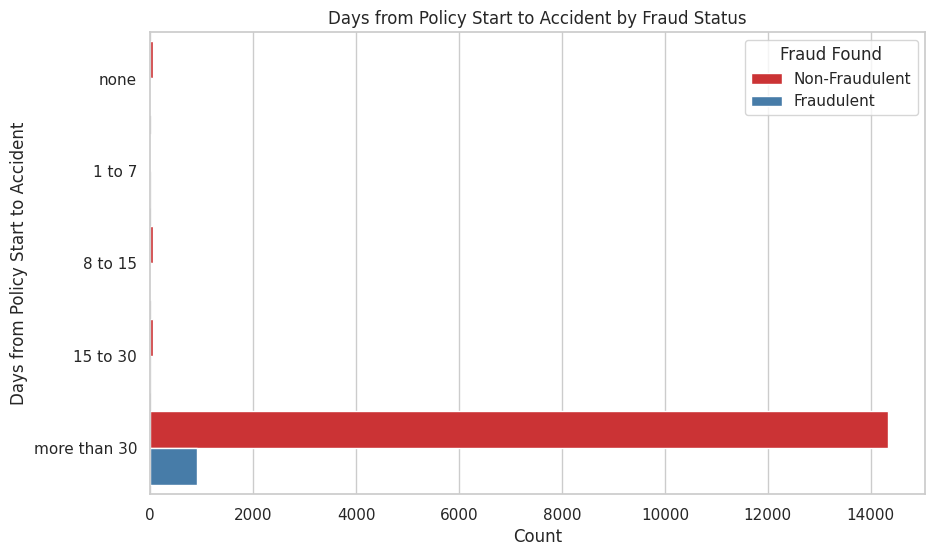

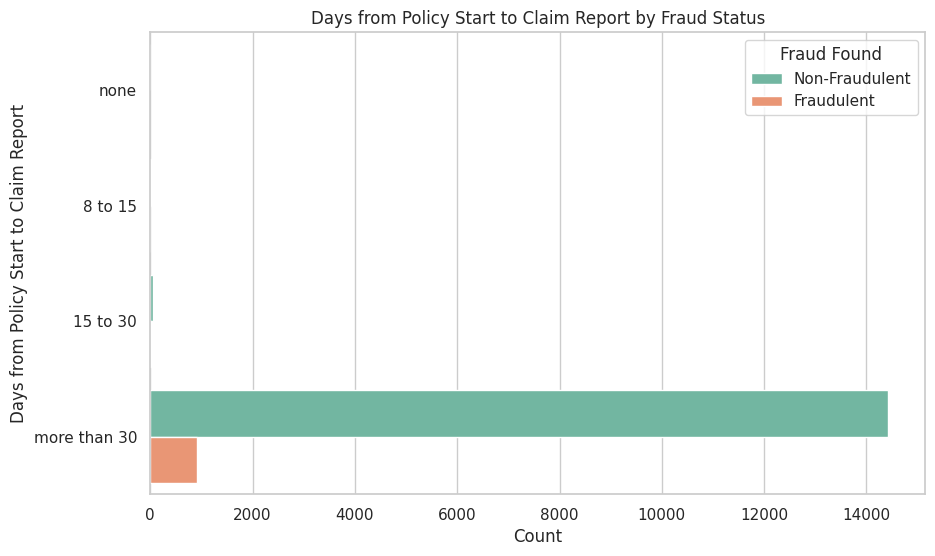

In [ ]:
# Visualization for Days_Policy_Accident
plt.figure(figsize=(10, 6))
sns.countplot(y='Days_Policy_Accident', hue='FraudFound_P', data=data, palette='Set1', order=['none', '1 to 7', '8 to 15', '15 to 30', 'more than 30'])
plt.title('Days from Policy Start to Accident by Fraud Status')
plt.xlabel('Count')
plt.ylabel('Days from Policy Start to Accident')
plt.legend(title='Fraud Found', labels=['Non-Fraudulent', 'Fraudulent'])
plt.show()

# Visualization for Days_Policy_Claim
plt.figure(figsize=(10, 6))
sns.countplot(y='Days_Policy_Claim', hue='FraudFound_P', data=data, palette='Set2', order=['none', '8 to 15', '15 to 30', 'more than 30'])
plt.title('Days from Policy Start to Claim Report by Fraud Status')
plt.xlabel('Count')
plt.ylabel('Days from Policy Start to Claim Report')
plt.legend(title='Fraud Found', labels=['Non-Fraudulent', 'Fraudulent'])
plt.show()


**Observation and Intaplatation**

**Days_Policy_Claim**
- **Predominance of "more than 30" Days**: The vast majority of both fraudulent and non-fraudulent claims are reported more than 30 days after the policy start. This indicates that most claims, regardless of fraud, are made well into the policy term.
- **Low Incidence in Shorter Durations**: Both the '15 to 30' and '8 to 15' days categories have very low numbers of claims, but the presence of fraud in these categories, although minimal, suggests that claims made shortly after policy inception might carry a higher risk of fraud.
- **"None" Category**: With only one non-fraudulent claim marked as 'none', it indicates an anomaly or a special case within the data that might require further investigation.

**Days_Policy_Accident**
- **"More than 30" Days Dominates**: Similar to `Days_Policy_Claim`, accidents occurring more than 30 days after policy initiation comprise the majority of both fraudulent and non-fraudulent claims, reinforcing the pattern that claims tend to occur later in the policy term.
- **Presence in Shorter Durations and "None"**: There are a few claims made very soon after the policy starts ('1 to 7', '8 to 15', and '15 to 30' days), with a small fraction being fraudulent. The 'none' category, with a slightly higher presence of fraud, might indicate specific cases where the time of accident relative to policy start wasn't recorded or is not applicable.

**Insights**
- **Long-Term Policyholders**: The data suggests that both regular and fraudulent claims predominantly occur from long-term policyholders (more than 30 days after policy start). This might indicate the need for sustained vigilance and fraud detection efforts throughout the policy term, not just at its inception.
  
- **Risk of Early Claims**: Although the numbers are small, the presence of fraudulent claims in the early weeks after policy initiation ('1 to 7', '8 to 15', '15 to 30' days) highlights a potential risk area. Insurance companies might consider implementing additional verification processes for claims made shortly after policy inception.
  
- **Fraud Detection Strategies**: The findings could inform targeted fraud detection strategies, focusing efforts on understanding the characteristics of claims made in these early durations as well as continuous monitoring throughout the policy term.

- **Policy and Process Review**: For the 'none' category and unusual patterns in early claims, insurers might review their policy terms, claim submission, and processing procedures to ensure clarity and to deter potential fraudulent activities.


In [ ]:
data.Year.value_counts()

1994    6142
1995    5195
1996    4083
Name: Year, dtype: int64

In [ ]:
pd.crosstab(data['FraudFound_P'], data['Year'], margins=True)

Year,1994,1995,1996,All
FraudFound_P,,,,
0,5733,4894,3870,14497
1,409,301,213,923
All,6142,5195,4083,15420


In [ ]:
df_years = pd.DataFrame({
    'Year': [1994, 1995, 1996],
    'TotalClaims': [6142, 5195, 4083],
    'FraudulentClaims': [409, 301, 213]
})
df_years['ProportionFraud'] = df_years['FraudulentClaims'] / df_years['TotalClaims']


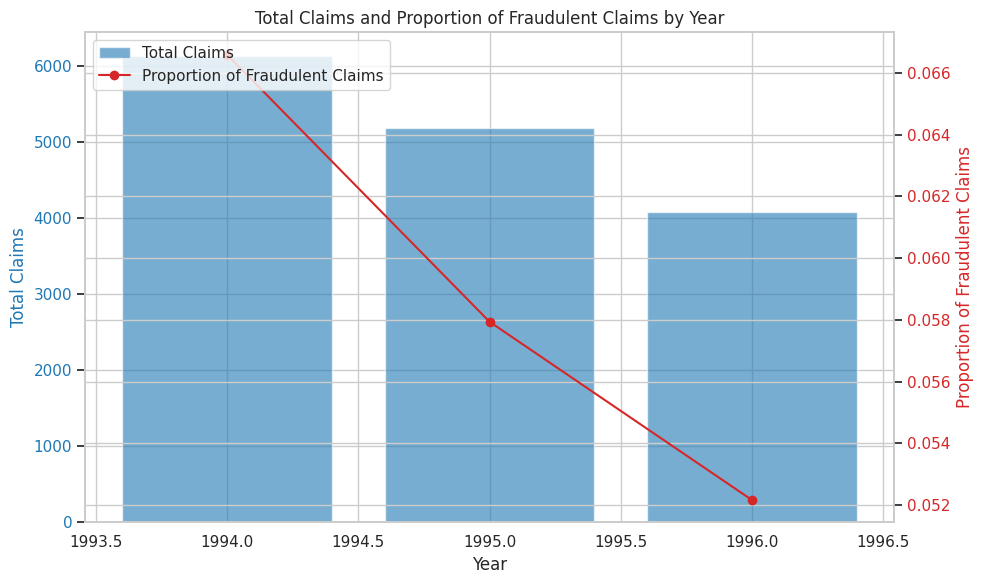

In [ ]:
# Setting the style
sns.set(style="whitegrid")

# Creating the figure and a twin y-axis to share the same x-axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart for total claims
color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Claims', color=color)
ax1.bar(df_years['Year'], df_years['TotalClaims'], color=color, alpha=0.6, label='Total Claims')
ax1.tick_params(axis='y', labelcolor=color)

# Creating the twin y-axis for the proportion of fraudulent claims
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Proportion of Fraudulent Claims', color=color)
ax2.plot(df_years['Year'], df_years['ProportionFraud'], color=color, marker='o', label='Proportion of Fraudulent Claims')
ax2.tick_params(axis='y', labelcolor=color)

# Adding legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# Adding title and adjusting layout
plt.title('Total Claims and Proportion of Fraudulent Claims by Year')
plt.tight_layout()

# Show plot
plt.show()


**Observations**

1. **Decreasing Trend in Total Claims**: There is a noticeable decrease in the total number of claims (both fraudulent and non-fraudulent) from 1994 through 1996. This could reflect changes in policyholder behavior, effectiveness of fraud detection mechanisms, or variations in the number of policies in force.

2. **Fraudulent Claims Trends**: Similar to the overall trend, the number of fraudulent claims decreases year over year. This could indicate that measures taken by the insurer are effectively reducing fraud or that there are external factors at play affecting the incidence of fraud.

3. **Proportion of Fraudulent Claims**: While the raw numbers of fraudulent claims decrease over the years, it would be insightful to consider the proportion of fraudulent claims relative to total claims each year to assess whether the rate of fraud is actually decreasing or if the trends are more reflective of the overall decrease in claims.

**Insights**
- **Effectiveness of Fraud Detection**: The decreasing trend in fraudulent claims could suggest that fraud detection and prevention strategies are becoming more effective. Analyzing the specific actions taken or technologies implemented over these years could provide insights into successful strategies.

- **Policy and Pricing Adjustments**: If the reduction in claims is correlated with changes in policy terms, pricing, or customer demographics, the insurer might consider further adjustments to optimize coverage offerings and pricing models.

In [ ]:
pd.crosstab(data['FraudFound_P'], data['AccidentArea'], margins=True)

AccidentArea,Rural,Urban,All
FraudFound_P,,,
0,1465,13032,14497
1,133,790,923
All,1598,13822,15420


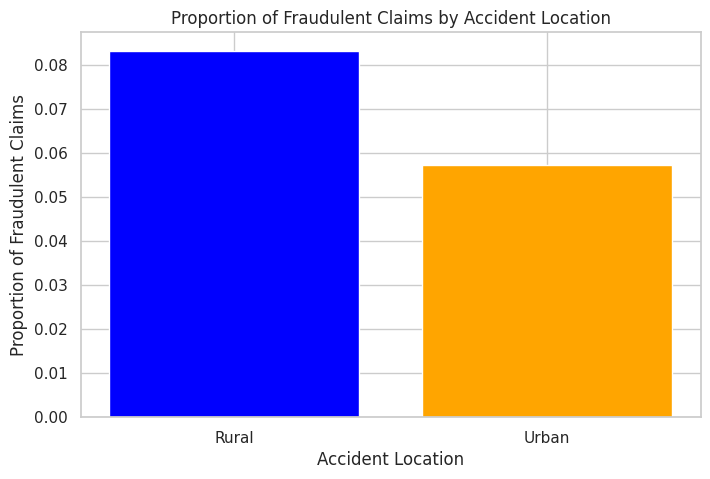

In [ ]:
##Accident Location (Urban vs. Rural): The location of the accident might have
#implications for the likelihood of fraud.

# Data preparation
locations = ['Rural', 'Urban']
fraud_counts = [133, 790]  # Number of fraudulent claims in Rural and Urban
total_counts = [1598, 13822]  # Total claims in Rural and Urban

# Calculating proportions
fraud_proportions = [fraud / total for fraud, total in zip(fraud_counts, total_counts)]

# Creating the bar chart
plt.figure(figsize=(8, 5))
plt.bar(locations, fraud_proportions, color=['blue', 'orange'])
plt.title('Proportion of Fraudulent Claims by Accident Location')
plt.xlabel('Accident Location')
plt.ylabel('Proportion of Fraudulent Claims')
plt.show()


**Observations and Interplatation**

- **Urban Dominance**: The vast majority of both fraudulent and non-fraudulent claims occur in urban areas. This could be due to a higher concentration of vehicles and policyholders in urban settings, leading to a higher absolute number of accidents and claims.
- **Rural vs. Urban Fraud Proportion**: While both settings see fraudulent claims, the proportion of fraud in urban areas appears higher when considering the total number of claims. This might reflect the opportunities or motivations for fraud in more densely populated areas.
- **Relative Risk of Fraud**: To assess the relative risk of fraud between rural and urban settings, it's crucial to compare the proportion of fraudulent claims within each location category to the total claims in that category.


In [ ]:
pd.crosstab(data['FraudFound_P'], data['PastNumberOfClaims'], margins=True)

PastNumberOfClaims,1,2 to 4,more than 4,none,All
FraudFound_P,,,,,
0,3351,5191,1942,4013,14497
1,222,294,68,339,923
All,3573,5485,2010,4352,15420


In [ ]:
# Create a dataset from the table above
historical_data = pd.DataFrame({
    'PastClaimsCategory': ['1', '2 to 4', 'more than 4', 'none'],
    'NonFraudulent': [3351, 5191, 1942, 4013],
    'Fraudulent': [222, 294, 68, 339]
})
historical_data['Total'] = historical_data['NonFraudulent'] + historical_data['Fraudulent']
historical_data['ProportionFraud'] = historical_data['Fraudulent'] / historical_data['Total']


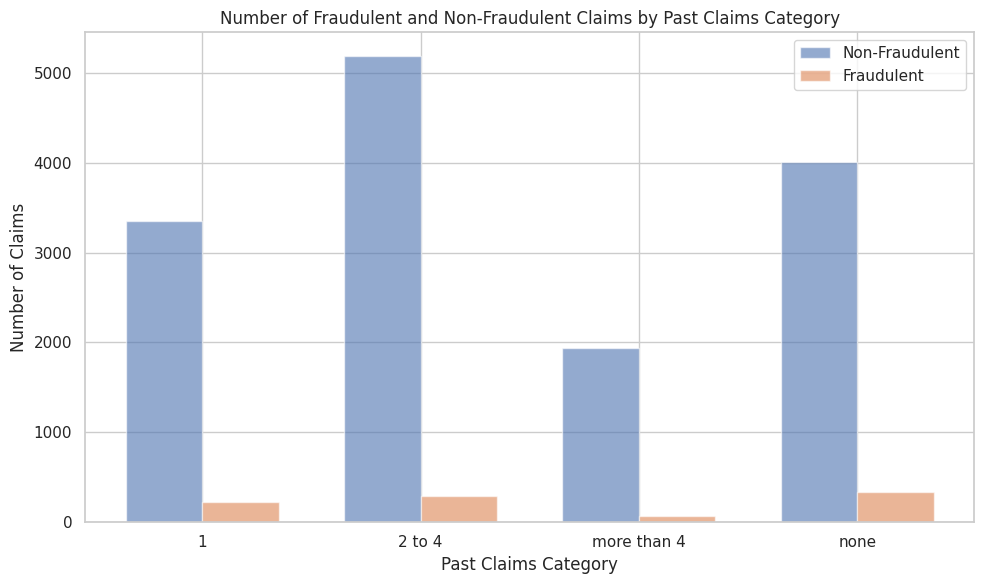

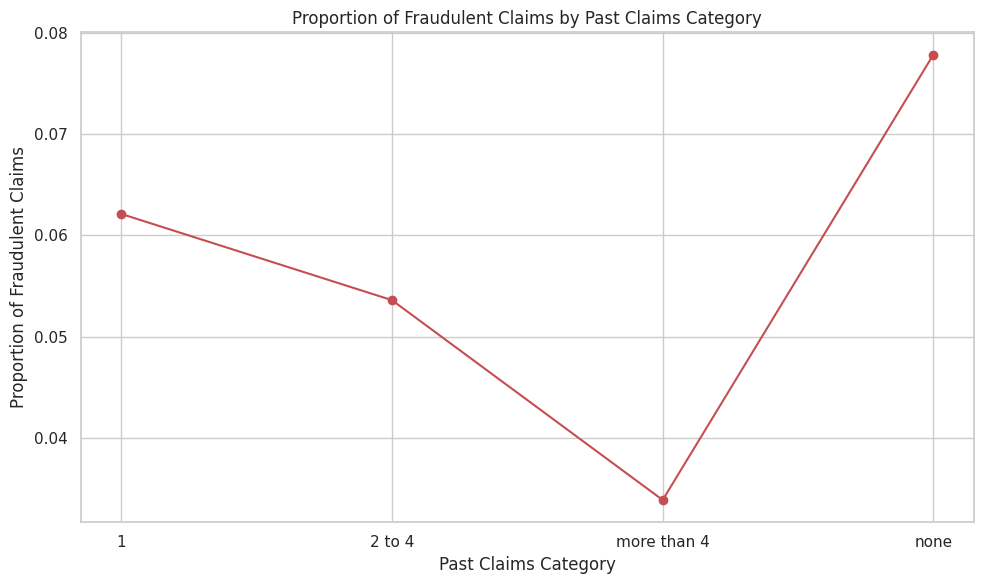

In [ ]:
# Setting the positions and width for the bars
positions = range(len(historical_data['PastClaimsCategory']))
bar_width = 0.35

# Plotting both fraudulent and non-fraudulent claims
plt.figure(figsize=(10, 6))
plt.bar(positions, historical_data['NonFraudulent'], width=bar_width, label='Non-Fraudulent', alpha=0.6)
plt.bar([p + bar_width for p in positions], historical_data['Fraudulent'], width=bar_width, label='Fraudulent', alpha=0.6)

# Adding category labels, title, and legend
plt.xticks([p + bar_width / 2 for p in positions], historical_data['PastClaimsCategory'])
plt.xlabel('Past Claims Category')
plt.ylabel('Number of Claims')
plt.title('Number of Fraudulent and Non-Fraudulent Claims by Past Claims Category')
plt.legend()

plt.tight_layout()
plt.show()


# Creating a Line Graph
plt.figure(figsize=(10, 6))
plt.plot(historical_data['PastClaimsCategory'], historical_data['ProportionFraud'], marker='o', linestyle='-', color='r')
plt.xlabel('Past Claims Category')
plt.ylabel('Proportion of Fraudulent Claims')
plt.title('Proportion of Fraudulent Claims by Past Claims Category')
plt.grid(True)

plt.tight_layout()
plt.show()





**Observations**

1. **Higher Incidence in "1" and "2 to 4" Claims Categories**: Both fraudulent and non-fraudulent claims are most common among policyholders who have previously made "1" or "2 to 4" claims. This suggests that having a history of a few claims is common among policyholders, irrespective of fraud.

2. **"More Than 4" Claims Category**: There's a noticeable drop in the number of claims (both fraudulent and non-fraudulent) as the number of past claims increases beyond 4. However, the presence of fraudulent claims in this category indicates that a history of multiple claims could be associated with a higher risk of fraud, albeit on a smaller scale compared to those with fewer claims.

3. **"None" Category Significance**: A significant number of claims come from policyholders with no history of past claims, highlighting that new policyholders or those without a claims history still contribute to both fraudulent and non-fraudulent claim volumes.

**Interpretations**

- **New Policyholders or First-Time Claimants**: The "none" category likely represents new policyholders or those who have never filed a claim before. The higher number of fraud claims in this group could indicate that fraudsters may target new policies where they perceive less scrutiny or believe the lack of a claim history might work in their favor.

- **Lack of Historical Data for Risk Assessment**: Insurance companies often use past claims history as part of their risk assessment process. For policyholders with no past claims, there might be less data available to flag potential risks, making it easier for fraudulent claims to slip through the initial screening processes.

- **Opportunistic Fraud**: Some instances of fraud in the "none" category could be opportunistic, arising from situations where individuals who typically wouldn't engage in fraudulent behavior decide to take advantage of a perceived opportunity, thinking they might face less suspicion as first-time claimants.



In [ ]:
pd.crosstab(data['FraudFound_P'], data['PoliceReportFiled'], margins=True)

PoliceReportFiled,No,Yes,All
FraudFound_P,,,
0,14085,412,14497
1,907,16,923
All,14992,428,15420


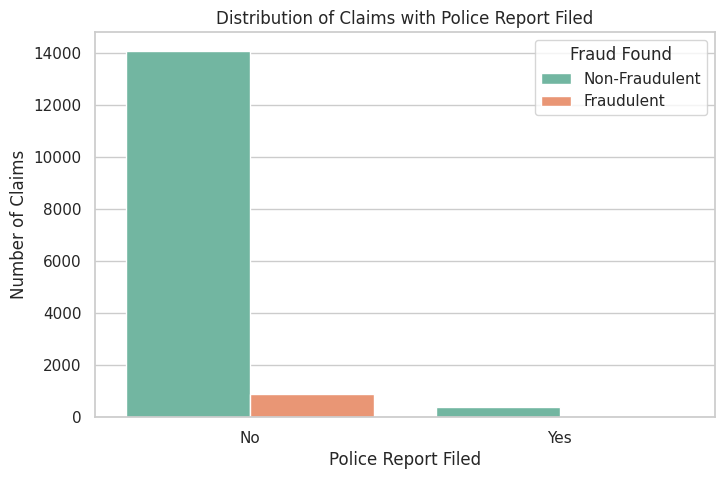

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='PoliceReportFiled', hue='FraudFound_P', data=data, palette='Set2')
plt.title('Distribution of Claims with Police Report Filed')
plt.xlabel('Police Report Filed')
plt.ylabel('Number of Claims')
plt.legend(title='Fraud Found', labels=['Non-Fraudulent', 'Fraudulent'])
plt.show()


In [ ]:
pd.crosstab(data['FraudFound_P'], data['WitnessPresent'], margins=True)

WitnessPresent,No,Yes,All
FraudFound_P,,,
0,14413,84,14497
1,920,3,923
All,15333,87,15420


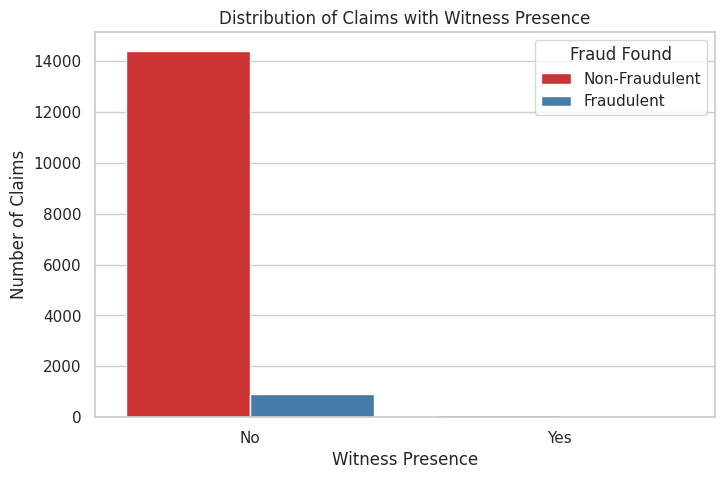

In [ ]:

plt.figure(figsize=(8, 5))
sns.countplot(x='WitnessPresent', hue='FraudFound_P', data=data, palette='Set1')
plt.title('Distribution of Claims with Witness Presence')
plt.xlabel('Witness Presence')
plt.ylabel('Number of Claims')
plt.legend(title='Fraud Found', labels=['Non-Fraudulent', 'Fraudulent'])
plt.show()

**Observations and Interpretation**

**Police Report Filed**
- **Low Frequency of Police Reports in Fraudulent Claims**: A significant majority of fraudulent claims (907 out of 923) did not have a police report filed. Only a small number (16) of fraudulent claims had a police report, suggesting that fraudsters may avoid filing police reports possibly due to the fear of legal consequences or the scrutiny a police report might invite.
- **Overall Low Police Report Filing**: Even among non-fraudulent claims, the majority did not have a police report filed. However, the proportion of claims with a police report is slightly higher in non-fraudulent claims compared to fraudulent ones.

**Witness Presence**
- **Very Low Presence of Witnesses in Claims**: Both fraudulent and non-fraudulent claims have a very low incidence of witness presence, with only 3 fraudulent claims and 84 non-fraudulent claims reporting a witness. This suggests that the presence of a witness is a rare occurrence in the context of these insurance claims.
- **Slight Indication Towards Legitimacy**: The presence of a witness, while rare, is more common in non-fraudulent claims than in fraudulent ones, indicating that witness testimony might slightly increase the perceived legitimacy of a claim.


In [ ]:
data.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy', 'MonthsDifference', 'WeeksDifference',
       'ApproxDurationInWeeks'],
      dtype='object')

In [ ]:
pd.crosstab(data['FraudFound_P'], data['BasePolicy'], margins=True)

BasePolicy,All Perils,Collision,Liability,All
FraudFound_P,,,,
0,3997,5527,4973,14497
1,452,435,36,923
All,4449,5962,5009,15420


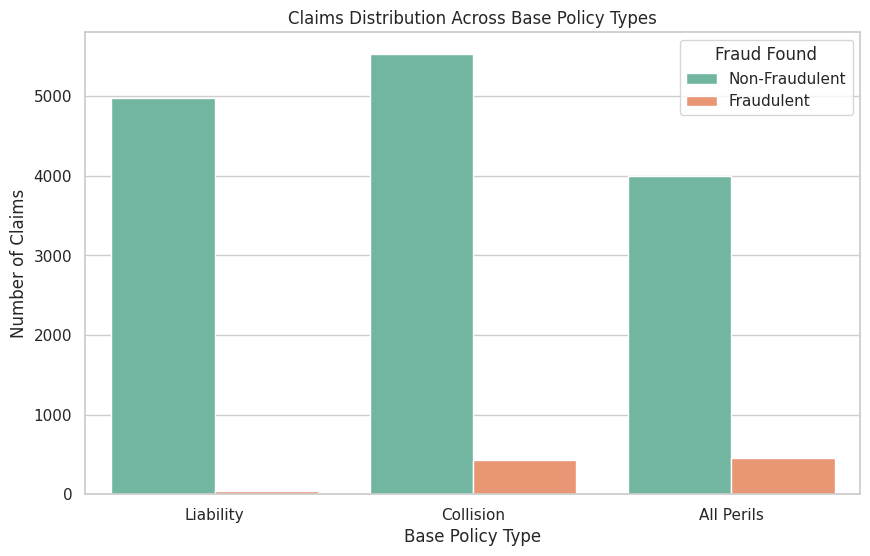

In [ ]:
# Visualization
plt.figure(figsize=(10, 6))
sns.countplot(x='BasePolicy', hue='FraudFound_P', data=data, palette='Set2')
plt.title('Claims Distribution Across Base Policy Types')
plt.xlabel('Base Policy Type')
plt.ylabel('Number of Claims')
plt.legend(title='Fraud Found', labels=['Non-Fraudulent', 'Fraudulent'])
plt.show()


**Observations**

- **Distribution Across Policy Types:**

  - The distribution of claims across different base policy types shows variability in the volume of claims, with **"Collision"** having the highest total number of claims, followed by **"Liability"** and **"All Perils"**.
  - This distribution might reflect the popularity or market penetration of these policy types or inherent risk factors associated with each.

- **Fraudulent Claims Concentration:**

  - **"All Perils"** and **"Collision"** policies have a higher number of fraudulent claims compared to **"Liability"**, suggesting that these policy types might be more attractive or vulnerable to fraud.
  - The significantly lower number of fraudulent claims in **"Liability"** policies could indicate that these policies are less prone to fraud, possibly due to the nature of the coverage or the conditions under which claims are made.

- **Proportion of Fraudulent Claims:**

  - When considering the proportions of fraudulent claims, **"All Perils"** policies seem to have the highest rate of fraud, followed closely by **"Collision"**. The **"Liability"** category shows a notably lower proportion of fraud, which might reflect different risk profiles or the effectiveness of fraud detection mechanisms for these policy types.

**Insights**

- **Risk Assessment and Policy Pricing:**
  - Insurance companies might need to adjust risk assessment models and policy pricing to reflect the higher risk of fraud in **"All Perils"** and **"Collision"** policies. Tailored fraud prevention strategies for these policy types could also be beneficial.

- **Fraud Detection Strategies:**
  - Enhancing fraud detection capabilities for **"All Perils"** and **"Collision"** policies could involve developing specific indicators or models that capture the unique patterns of fraud in these policy types.



In [ ]:
## Let's look at number of cars
pd.crosstab(data['FraudFound_P'], data['NumberOfCars'], margins=True)

NumberOfCars,1 vehicle,2 vehicles,3 to 4,5 to 8,more than 8,All
FraudFound_P,,,,,,
0,13466,666,343,20,2,14497
1,850,43,29,1,0,923
All,14316,709,372,21,2,15420


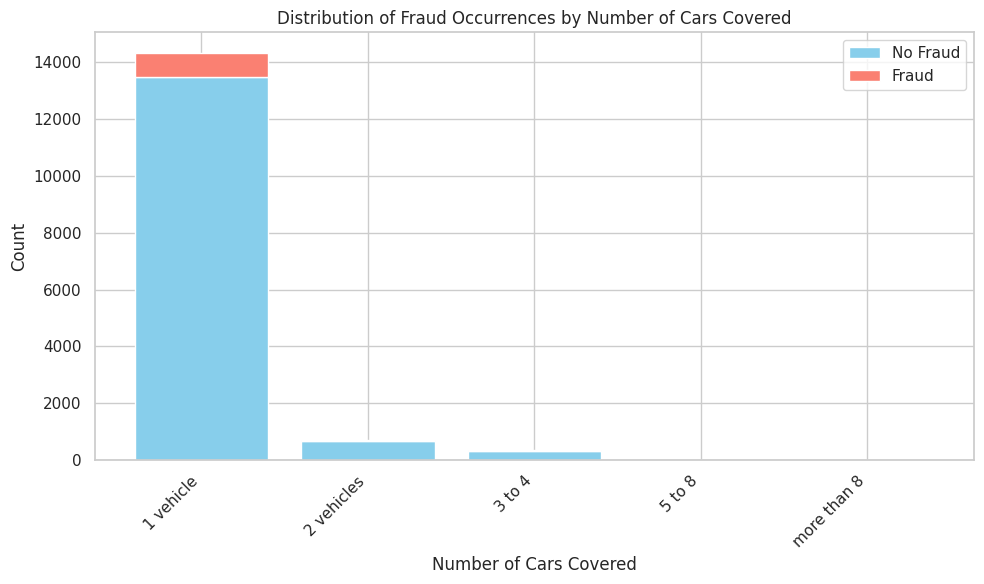

In [ ]:
# Extract data for visualization
num_cars = ['1 vehicle', '2 vehicles', '3 to 4', '5 to 8', 'more than 8']
fraud_0 = data.loc[data['FraudFound_P'] == 0, 'NumberOfCars'].values
fraud_1 = data.loc[data['FraudFound_P'] == 1, 'NumberOfCars'].values

# Count occurrences of each category
count_0 = [list(fraud_0).count(car) for car in num_cars]
count_1 = [list(fraud_1).count(car) for car in num_cars]

# Set up the figure and axis
plt.figure(figsize=(10, 6))

# Plot the stacked bars
plt.bar(num_cars, count_0, label='No Fraud', color='skyblue')
plt.bar(num_cars, count_1, label='Fraud', color='salmon', bottom=count_0)

# Add labels and title
plt.xlabel('Number of Cars Covered')
plt.ylabel('Count')
plt.title('Distribution of Fraud Occurrences by Number of Cars Covered')
plt.legend()

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()


**Observation**

* **Single-vehicle policies are the most common** - They also have the highest number of fraudulent claims. This could indicate that single-vehicle policies are more susceptible to fraud, or it could simply be a reflection of their prevalence.

* As the number of vehicles in the policy increases, the number of instances of claims decreases. This could suggest that policies covering multiple vehicles have a lower risk of fraud.

We can go further to understand the relationship between he number of cars under a policy is a significant predictor of fraud. To do this we will use *chi-square test* which determines where there is a relationship between two categorical variable.


In [ ]:
import numpy as np
import scipy.stats as stats

# First, let's create a contingency table based on your data
contingency_table = np.array([
    [13466, 666, 343, 20, 2],
    [850, 43, 29, 1, 0]
])

# Perform the chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected contingency table:")
print(expected)


Chi-square statistic: 2.416090815658887
P-value: 0.6597213602888092
Degrees of freedom: 4
Expected contingency table:
[[1.34590825e+04 6.66561154e+02 3.49733074e+02 1.97429961e+01
  1.88028534e+00]
 [8.56917510e+02 4.24388457e+01 2.22669261e+01 1.25700389e+00
  1.19714656e-01]]


* The chi-square statistic is 2.416, which is relatively small given the degrees of freedom (4). This suggests that the observed frequencies in our contingency table are not very different from the frequencies that would be expected if the number of cars and fraud were independent.

* The p-value is 0.660, which is much larger than the typical threshold of 0.05 used in statistical tests. A large p-value indicates that the observed data is quite likely under the null hypothesis of independence, so we do not have strong evidence to reject the null hypothesis.

* The expected contingency table shows the frequencies that would be expected under the null hypothesis of independence. These are quite close to our observed frequencies, further suggesting that the number of cars and fraud are independent.

Based on this chi-square test, the number of cars under a policy does not appear to be a significant predictor of insurance fraud.

### Correlation visualization

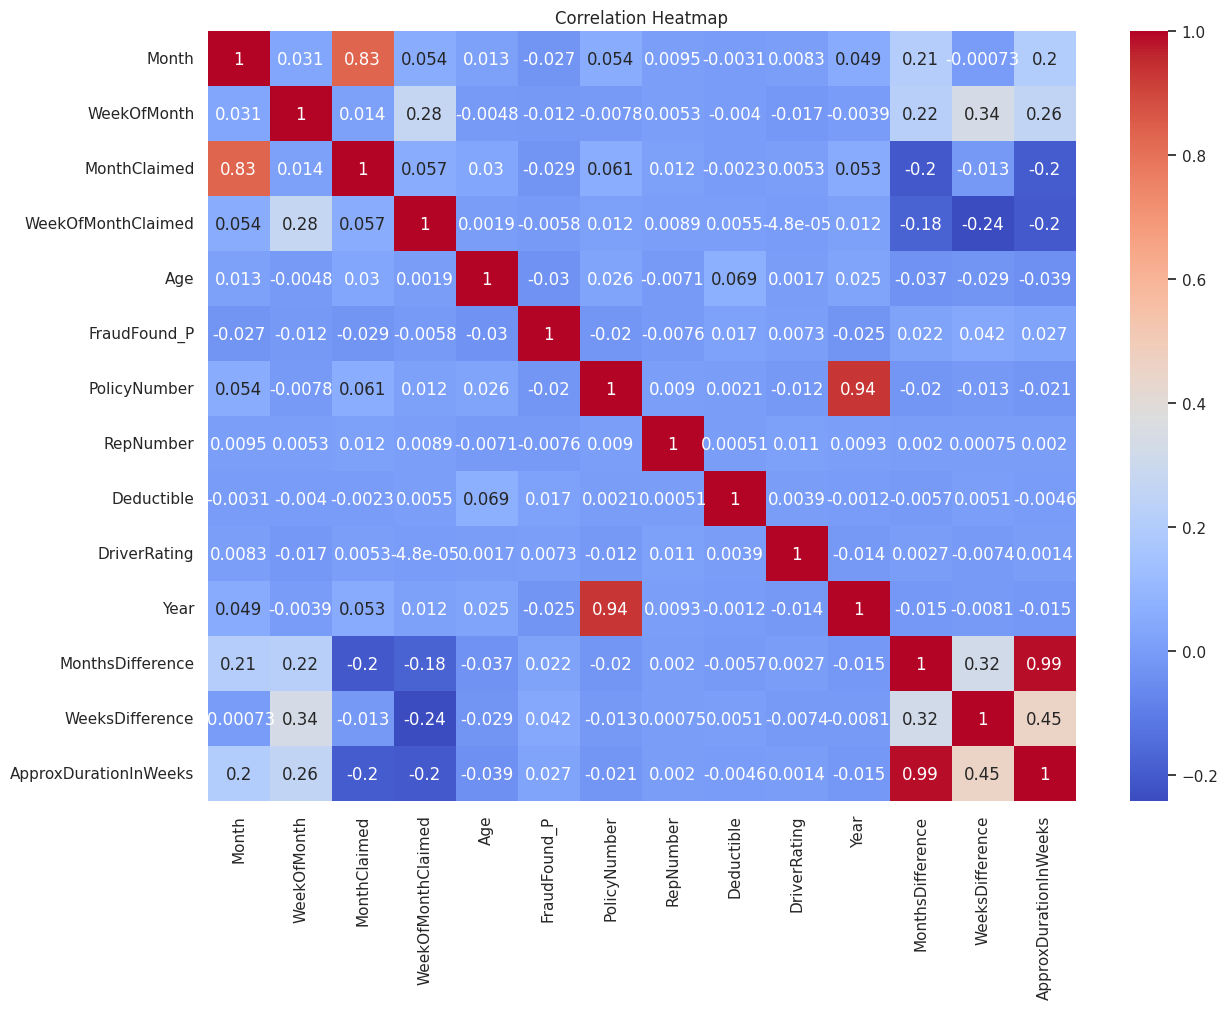

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_df = data.select_dtypes(include=[np.number])  # Select only numerical columns

correlation_matrix = numerical_df.corr()  # Compute the correlation matrix

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


From the correlation heatmap, we can draw the following observasions:

1. **High Positive Correlation:** The variables `PolicyNumber` and `Year` have a high positive correlation of 0.94. This suggests that these two variables move in the same direction; as one increases, the other tends to increase as well.

2. **No Significant Correlation:** Most pairs of variables do not show a significant correlation (values close to 0), suggesting that they do not have a linear relationship.

3. **Negative Correlation:** There are some pairs of variables with negative correlations (values less than 0), but these correlations are weak. A negative correlation indicates that as one variable increases, the other tends to decrease.

4. **Correlation with Target Variable:** The correlations between FraudFound_P (our target variable) and other variables are all close to 0, suggesting that none of these variables have a strong linear relationship with FraudFound_P.

Remember, correlation does not imply causation. Even if two variables are correlated, it does not mean that one causes the other to change. Furthermore, this heatmap only shows linear correlations. There could be other non-linear relationships between variables that this analysis does not capture